# Traffic Detection on Road - PID20

In [1]:
import numpy as np                                    # to perform a wide variety of mathematical operations on arrays.                                             
import pandas as pd                                   # pandas is used to analyze data.

import os                                             # a portable way of using operating system dependent functionality.
import csv                                            # implements classes to read and write tabular data in CSV format.
import cv2                                            # for image processing and performing computer vision tasks.
import pickle                                         # to dump and load data
import seaborn as sns                                 # for making statistical graphics

from skimage.io import imread                         # to read an image 
from skimage.transform import resize                  # It is used to Warp an image according to a given coordinate transformation. 
import matplotlib.pyplot as plt                       # plotting

from sklearn.model_selection import train_test_split  # to split data in training and testing
from sklearn.metrics import classification_report     # to get classification report
import sklearn.metrics as metrics                     # get all metrices functions
from sklearn.metrics import accuracy_score            # to compute accuracy


from sklearn.metrics import confusion_matrix          # to get confusion matrix for testing data
from datetime import datetime                         # to calculate time
from sklearn import linear_model               

from sklearn.cluster import KMeans                    # to import Kmeans Clusterring
from sklearn.model_selection import GridSearchCV      # to import Grid method for training
from sklearn.neighbors import KNeighborsClassifier    # to import KNN
from sklearn.svm import LinearSVC                     # to import SVC with linear kernel
from sklearn.svm import SVC                           # to import SVC
from sklearn.tree import DecisionTreeClassifier       # to import Decision tree classifier
from sklearn.ensemble import RandomForestClassifier   # to import random forest classifier
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold    
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer          # to normalize sift feature extracted

from sklearn.naive_bayes import GaussianNB

# Preprocessing and feature description

In [2]:
folder1=r"C:\Users\Administrator\Desktop\college\TY\Sem2\CV\CP\database\P-img"
folder2=r"C:\Users\Administrator\Desktop\college\TY\Sem2\CV\CP\database\N-img"

## ORB Descriptors
### POSITIVE

In [3]:
i=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(430,280)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise orb descriptor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:\\Users\\Administrator\\Desktop\\college\\TY\\Sem2\\CV\\CP\\database\\P-img.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (497, 32)
descriptor shape  1  :  (497, 32)
descriptor shape  2  :  (500, 32)
descriptor shape  3  :  (500, 32)
descriptor shape  4  :  (497, 32)
descriptor shape  5  :  (496, 32)
descriptor shape  6  :  (499, 32)
descriptor shape  7  :  (488, 32)
descriptor shape  8  :  (500, 32)
descriptor shape  9  :  (493, 32)
descriptor shape  10  :  (499, 32)
descriptor shape  11  :  (495, 32)
descriptor shape  12  :  (500, 32)
descriptor shape  13  :  (491, 32)
descriptor shape  14  :  (486, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (495, 32)
descriptor shape  17  :  (499, 32)
descriptor shape  18  :  (487, 32)
descriptor shape  19  :  (500, 32)
descriptor shape  20  :  (499, 32)
descriptor shape  21  :  (489, 32)
descriptor shape  22  :  (500, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (500, 32)
descriptor shape  25  :  (500, 32)
descriptor shape  26  :  (481, 32)
descriptor shape  27  :  (499, 32)
descriptor shape  28  :  (488,

descriptor shape  241  :  (500, 32)
descriptor shape  242  :  (500, 32)
descriptor shape  243  :  (500, 32)
descriptor shape  244  :  (500, 32)
descriptor shape  245  :  (496, 32)
descriptor shape  246  :  (500, 32)
descriptor shape  247  :  (500, 32)
descriptor shape  248  :  (500, 32)
descriptor shape  249  :  (500, 32)
descriptor shape  250  :  (500, 32)
descriptor shape  251  :  (500, 32)
descriptor shape  252  :  (495, 32)
descriptor shape  253  :  (500, 32)
descriptor shape  254  :  (499, 32)
descriptor shape  255  :  (500, 32)
descriptor shape  256  :  (500, 32)
descriptor shape  257  :  (500, 32)
descriptor shape  258  :  (500, 32)
descriptor shape  259  :  (500, 32)
descriptor shape  260  :  (500, 32)
descriptor shape  261  :  (491, 32)
descriptor shape  262  :  (500, 32)
descriptor shape  263  :  (491, 32)
descriptor shape  264  :  (500, 32)
descriptor shape  265  :  (500, 32)
descriptor shape  266  :  (500, 32)
descriptor shape  267  :  (496, 32)
descriptor shape  268  :  (4

descriptor shape  478  :  (500, 32)
descriptor shape  479  :  (500, 32)
descriptor shape  480  :  (499, 32)
descriptor shape  481  :  (495, 32)
descriptor shape  482  :  (482, 32)
descriptor shape  483  :  (495, 32)
descriptor shape  484  :  (500, 32)
descriptor shape  485  :  (500, 32)
descriptor shape  486  :  (487, 32)
descriptor shape  487  :  (499, 32)
descriptor shape  488  :  (491, 32)
descriptor shape  489  :  (492, 32)
descriptor shape  490  :  (500, 32)
descriptor shape  491  :  (485, 32)
descriptor shape  492  :  (499, 32)
descriptor shape  493  :  (500, 32)
descriptor shape  494  :  (484, 32)
descriptor shape  495  :  (482, 32)
descriptor shape  496  :  (495, 32)
descriptor shape  497  :  (491, 32)
descriptor shape  498  :  (500, 32)
descriptor shape  499  :  (495, 32)
descriptor shape  500  :  (500, 32)
descriptor shape  501  :  (496, 32)
descriptor shape  502  :  (496, 32)
descriptor shape  503  :  (493, 32)
descriptor shape  504  :  (500, 32)
descriptor shape  505  :  (4

descriptor shape  712  :  (500, 32)
descriptor shape  713  :  (500, 32)
descriptor shape  714  :  (500, 32)
descriptor shape  715  :  (500, 32)
descriptor shape  716  :  (492, 32)
descriptor shape  717  :  (500, 32)
descriptor shape  718  :  (500, 32)
descriptor shape  719  :  (500, 32)
descriptor shape  720  :  (500, 32)
descriptor shape  721  :  (500, 32)
descriptor shape  722  :  (500, 32)
descriptor shape  723  :  (500, 32)
descriptor shape  724  :  (495, 32)
descriptor shape  725  :  (500, 32)
descriptor shape  726  :  (500, 32)
descriptor shape  727  :  (500, 32)
descriptor shape  728  :  (485, 32)
descriptor shape  729  :  (500, 32)
descriptor shape  730  :  (500, 32)
descriptor shape  731  :  (497, 32)
descriptor shape  732  :  (496, 32)
descriptor shape  733  :  (497, 32)
descriptor shape  734  :  (500, 32)
descriptor shape  735  :  (500, 32)
descriptor shape  736  :  (500, 32)
descriptor shape  737  :  (487, 32)
descriptor shape  738  :  (499, 32)
descriptor shape  739  :  (4

descriptor shape  940  :  (494, 32)
descriptor shape  941  :  (494, 32)
descriptor shape  942  :  (485, 32)
descriptor shape  943  :  (485, 32)
descriptor shape  944  :  (500, 32)
descriptor shape  945  :  (500, 32)
descriptor shape  946  :  (500, 32)
descriptor shape  947  :  (500, 32)
descriptor shape  948  :  (482, 32)
descriptor shape  949  :  (485, 32)
descriptor shape  950  :  (481, 32)
descriptor shape  951  :  (500, 32)
descriptor shape  952  :  (500, 32)
descriptor shape  953  :  (500, 32)
descriptor shape  954  :  (500, 32)
descriptor shape  955  :  (500, 32)
descriptor shape  956  :  (500, 32)
descriptor shape  957  :  (500, 32)
descriptor shape  958  :  (500, 32)
descriptor shape  959  :  (500, 32)
descriptor shape  960  :  (500, 32)
descriptor shape  961  :  (500, 32)
descriptor shape  962  :  (493, 32)
descriptor shape  963  :  (500, 32)
descriptor shape  964  :  (500, 32)
descriptor shape  965  :  (499, 32)
descriptor shape  966  :  (500, 32)
descriptor shape  967  :  (5

descriptor shape  1175  :  (500, 32)
descriptor shape  1176  :  (498, 32)
descriptor shape  1177  :  (491, 32)
descriptor shape  1178  :  (494, 32)
descriptor shape  1179  :  (500, 32)
descriptor shape  1180  :  (474, 32)
descriptor shape  1181  :  (500, 32)
descriptor shape  1182  :  (500, 32)
descriptor shape  1183  :  (490, 32)
descriptor shape  1184  :  (489, 32)
descriptor shape  1185  :  (496, 32)
descriptor shape  1186  :  (491, 32)
descriptor shape  1187  :  (496, 32)
descriptor shape  1188  :  (500, 32)
descriptor shape  1189  :  (497, 32)
descriptor shape  1190  :  (498, 32)
descriptor shape  1191  :  (489, 32)
descriptor shape  1192  :  (499, 32)
descriptor shape  1193  :  (500, 32)
descriptor shape  1194  :  (492, 32)
descriptor shape  1195  :  (500, 32)
descriptor shape  1196  :  (495, 32)
descriptor shape  1197  :  (492, 32)
descriptor shape  1198  :  (490, 32)
descriptor shape  1199  :  (500, 32)
descriptor shape  1200  :  (500, 32)
descriptor shape  1201  :  (486, 32)
d

descriptor shape  1399  :  (493, 32)
descriptor shape  1400  :  (500, 32)
descriptor shape  1401  :  (498, 32)
descriptor shape  1402  :  (489, 32)
descriptor shape  1403  :  (495, 32)
descriptor shape  1404  :  (492, 32)
descriptor shape  1405  :  (497, 32)
descriptor shape  1406  :  (500, 32)
descriptor shape  1407  :  (500, 32)
descriptor shape  1408  :  (493, 32)
descriptor shape  1409  :  (500, 32)
descriptor shape  1410  :  (500, 32)
descriptor shape  1411  :  (499, 32)
descriptor shape  1412  :  (492, 32)
descriptor shape  1413  :  (491, 32)
descriptor shape  1414  :  (500, 32)
descriptor shape  1415  :  (495, 32)
descriptor shape  1416  :  (500, 32)
descriptor shape  1417  :  (500, 32)
descriptor shape  1418  :  (483, 32)
descriptor shape  1419  :  (488, 32)
descriptor shape  1420  :  (500, 32)
descriptor shape  1421  :  (492, 32)
descriptor shape  1422  :  (500, 32)
descriptor shape  1423  :  (500, 32)
descriptor shape  1424  :  (487, 32)
descriptor shape  1425  :  (492, 32)
d

descriptor shape  1624  :  (494, 32)
descriptor shape  1625  :  (495, 32)
descriptor shape  1626  :  (496, 32)
descriptor shape  1627  :  (494, 32)
descriptor shape  1628  :  (497, 32)
descriptor shape  1629  :  (500, 32)
descriptor shape  1630  :  (491, 32)
descriptor shape  1631  :  (498, 32)
descriptor shape  1632  :  (500, 32)
descriptor shape  1633  :  (492, 32)
descriptor shape  1634  :  (487, 32)
descriptor shape  1635  :  (500, 32)
descriptor shape  1636  :  (500, 32)
descriptor shape  1637  :  (500, 32)
descriptor shape  1638  :  (493, 32)
descriptor shape  1639  :  (491, 32)
descriptor shape  1640  :  (492, 32)
descriptor shape  1641  :  (500, 32)
descriptor shape  1642  :  (500, 32)
descriptor shape  1643  :  (487, 32)
descriptor shape  1644  :  (487, 32)
descriptor shape  1645  :  (495, 32)
descriptor shape  1646  :  (500, 32)
descriptor shape  1647  :  (492, 32)
descriptor shape  1648  :  (493, 32)
descriptor shape  1649  :  (482, 32)
descriptor shape  1650  :  (477, 32)
d

descriptor shape  1858  :  (500, 32)
descriptor shape  1859  :  (484, 32)
descriptor shape  1860  :  (500, 32)
descriptor shape  1861  :  (500, 32)
descriptor shape  1862  :  (500, 32)
descriptor shape  1863  :  (486, 32)
descriptor shape  1864  :  (492, 32)
descriptor shape  1865  :  (488, 32)
descriptor shape  1866  :  (500, 32)
descriptor shape  1867  :  (494, 32)
descriptor shape  1868  :  (491, 32)
descriptor shape  1869  :  (486, 32)
descriptor shape  1870  :  (494, 32)
descriptor shape  1871  :  (497, 32)
descriptor shape  1872  :  (500, 32)
descriptor shape  1873  :  (489, 32)
descriptor shape  1874  :  (492, 32)
descriptor shape  1875  :  (497, 32)
descriptor shape  1876  :  (492, 32)
descriptor shape  1877  :  (487, 32)
descriptor shape  1878  :  (487, 32)
descriptor shape  1879  :  (487, 32)
descriptor shape  1880  :  (471, 32)
descriptor shape  1881  :  (500, 32)
descriptor shape  1882  :  (498, 32)
descriptor shape  1883  :  (489, 32)
descriptor shape  1884  :  (478, 32)
d

descriptor shape  2080  :  (495, 32)
descriptor shape  2081  :  (500, 32)
descriptor shape  2082  :  (458, 32)
descriptor shape  2083  :  (468, 32)
descriptor shape  2084  :  (500, 32)
descriptor shape  2085  :  (494, 32)
descriptor shape  2086  :  (500, 32)
descriptor shape  2087  :  (488, 32)
descriptor shape  2088  :  (500, 32)
descriptor shape  2089  :  (496, 32)
descriptor shape  2090  :  (492, 32)
descriptor shape  2091  :  (435, 32)
descriptor shape  2092  :  (444, 32)
descriptor shape  2093  :  (500, 32)
descriptor shape  2094  :  (500, 32)
descriptor shape  2095  :  (487, 32)
descriptor shape  2096  :  (500, 32)
descriptor shape  2097  :  (500, 32)
descriptor shape  2098  :  (500, 32)
descriptor shape  2099  :  (498, 32)
descriptor shape  2100  :  (497, 32)
descriptor shape  2101  :  (500, 32)
descriptor shape  2102  :  (500, 32)
descriptor shape  2103  :  (500, 32)
descriptor shape  2104  :  (428, 32)
descriptor shape  2105  :  (434, 32)
descriptor shape  2106  :  (443, 32)
d

descriptor shape  2314  :  (480, 32)
descriptor shape  2315  :  (488, 32)
descriptor shape  2316  :  (486, 32)
descriptor shape  2317  :  (464, 32)
descriptor shape  2318  :  (479, 32)
descriptor shape  2319  :  (479, 32)
descriptor shape  2320  :  (458, 32)
descriptor shape  2321  :  (483, 32)
descriptor shape  2322  :  (496, 32)
descriptor shape  2323  :  (474, 32)
descriptor shape  2324  :  (488, 32)
descriptor shape  2325  :  (475, 32)
descriptor shape  2326  :  (479, 32)
descriptor shape  2327  :  (483, 32)
descriptor shape  2328  :  (469, 32)
descriptor shape  2329  :  (467, 32)
descriptor shape  2330  :  (473, 32)
descriptor shape  2331  :  (447, 32)
descriptor shape  2332  :  (460, 32)
descriptor shape  2333  :  (459, 32)
descriptor shape  2334  :  (497, 32)
descriptor shape  2335  :  (493, 32)
descriptor shape  2336  :  (500, 32)
descriptor shape  2337  :  (479, 32)
descriptor shape  2338  :  (478, 32)
descriptor shape  2339  :  (472, 32)
descriptor shape  2340  :  (442, 32)
d

descriptor shape  2537  :  (479, 32)
descriptor shape  2538  :  (471, 32)
descriptor shape  2539  :  (476, 32)
descriptor shape  2540  :  (464, 32)
descriptor shape  2541  :  (457, 32)
descriptor shape  2542  :  (476, 32)
descriptor shape  2543  :  (450, 32)
descriptor shape  2544  :  (500, 32)
descriptor shape  2545  :  (462, 32)
descriptor shape  2546  :  (500, 32)
descriptor shape  2547  :  (480, 32)
descriptor shape  2548  :  (484, 32)
descriptor shape  2549  :  (491, 32)
descriptor shape  2550  :  (484, 32)
descriptor shape  2551  :  (485, 32)
descriptor shape  2552  :  (472, 32)
descriptor shape  2553  :  (477, 32)
descriptor shape  2554  :  (490, 32)
descriptor shape  2555  :  (484, 32)
descriptor shape  2556  :  (500, 32)
descriptor shape  2557  :  (500, 32)
descriptor shape  2558  :  (500, 32)
descriptor shape  2559  :  (487, 32)
descriptor shape  2560  :  (483, 32)
descriptor shape  2561  :  (486, 32)
descriptor shape  2562  :  (488, 32)
descriptor shape  2563  :  (487, 32)
d

descriptor shape  2762  :  (500, 32)
descriptor shape  2763  :  (500, 32)
descriptor shape  2764  :  (500, 32)
descriptor shape  2765  :  (495, 32)
descriptor shape  2766  :  (500, 32)
descriptor shape  2767  :  (500, 32)
descriptor shape  2768  :  (451, 32)
descriptor shape  2769  :  (500, 32)
descriptor shape  2770  :  (500, 32)
descriptor shape  2771  :  (499, 32)
descriptor shape  2772  :  (496, 32)
descriptor shape  2773  :  (497, 32)
descriptor shape  2774  :  (500, 32)
descriptor shape  2775  :  (500, 32)
descriptor shape  2776  :  (500, 32)
descriptor shape  2777  :  (500, 32)
descriptor shape  2778  :  (465, 32)
descriptor shape  2779  :  (500, 32)
descriptor shape  2780  :  (500, 32)
descriptor shape  2781  :  (500, 32)
descriptor shape  2782  :  (500, 32)
descriptor shape  2783  :  (500, 32)
descriptor shape  2784  :  (500, 32)
descriptor shape  2785  :  (500, 32)
descriptor shape  2786  :  (500, 32)
descriptor shape  2787  :  (500, 32)
descriptor shape  2788  :  (500, 32)
d

descriptor shape  2994  :  (498, 32)
descriptor shape  2995  :  (500, 32)
descriptor shape  2996  :  (500, 32)
descriptor shape  2997  :  (497, 32)
descriptor shape  2998  :  (492, 32)
descriptor shape  2999  :  (483, 32)
descriptor shape  3000  :  (492, 32)


In [85]:
data1 = pd.read_csv(r'C:\Users\Administrator\Desktop\college\TY\Sem2\CV\CP\database\P-img.csv',header=None,dtype='uint8')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data1=data1.astype(np.uint8) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,54,173,99,254,212,243,182,230,23,128,...,12,255,58,94,143,235,213,95,116,138
1,199,191,229,183,252,44,237,191,63,251,...,223,226,188,62,255,228,140,244,177,121
2,145,254,127,223,244,127,255,254,125,106,...,41,255,247,191,115,196,69,241,99,185
3,217,177,141,103,136,95,77,61,48,249,...,249,12,239,203,109,244,42,178,131,120
4,55,61,239,135,246,115,231,251,211,238,...,60,174,120,79,173,182,229,255,244,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474317,92,181,123,126,186,221,87,121,179,206,...,186,31,243,255,37,187,34,226,134,243
1474318,135,42,140,29,172,43,164,134,222,179,...,207,96,12,50,223,84,204,121,153,132
1474319,150,29,63,191,142,102,189,51,188,70,...,51,111,241,163,254,144,132,96,165,114
1474320,28,126,60,186,58,241,27,216,150,254,...,42,63,219,199,43,189,178,199,47,123


### ORB NEGATIVE

In [5]:
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:\\Users\\Administrator\\Desktop\\college\\TY\\Sem2\\CV\\CP\\database\\N-img.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (493, 32)
descriptor shape  1  :  (407, 32)
descriptor shape  2  :  (430, 32)
descriptor shape  3  :  (472, 32)
descriptor shape  4  :  (491, 32)
descriptor shape  5  :  (486, 32)
descriptor shape  6  :  (438, 32)
descriptor shape  7  :  (485, 32)
descriptor shape  8  :  (486, 32)
descriptor shape  9  :  (459, 32)
descriptor shape  10  :  (452, 32)
descriptor shape  11  :  (471, 32)
descriptor shape  12  :  (482, 32)
descriptor shape  13  :  (482, 32)
descriptor shape  14  :  (451, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (494, 32)
descriptor shape  17  :  (411, 32)
descriptor shape  18  :  (474, 32)
descriptor shape  19  :  (193, 32)
descriptor shape  20  :  (488, 32)
descriptor shape  21  :  (478, 32)
descriptor shape  22  :  (498, 32)
descriptor shape  23  :  (313, 32)
descriptor shape  24  :  (486, 32)
descriptor shape  25  :  (466, 32)
descriptor shape  26  :  (457, 32)
descriptor shape  27  :  (461, 32)
descriptor shape  28  :  (472,

descriptor shape  239  :  (488, 32)
descriptor shape  240  :  (487, 32)
descriptor shape  241  :  (481, 32)
descriptor shape  242  :  (152, 32)
descriptor shape  243  :  (500, 32)
descriptor shape  244  :  (169, 32)
descriptor shape  245  :  (488, 32)
descriptor shape  246  :  (489, 32)
descriptor shape  247  :  (450, 32)
descriptor shape  248  :  (463, 32)
descriptor shape  249  :  (440, 32)
descriptor shape  250  :  (308, 32)
descriptor shape  251  :  (493, 32)
descriptor shape  252  :  (451, 32)
descriptor shape  253  :  (427, 32)
descriptor shape  254  :  (472, 32)
descriptor shape  255  :  (500, 32)
descriptor shape  256  :  (487, 32)
descriptor shape  257  :  (364, 32)
descriptor shape  258  :  (442, 32)
descriptor shape  259  :  (500, 32)
descriptor shape  260  :  (457, 32)
descriptor shape  261  :  (500, 32)
descriptor shape  262  :  (440, 32)
descriptor shape  263  :  (449, 32)
descriptor shape  264  :  (349, 32)
descriptor shape  265  :  (460, 32)
descriptor shape  266  :  (4

descriptor shape  473  :  (487, 32)
descriptor shape  474  :  (489, 32)
descriptor shape  475  :  (450, 32)
descriptor shape  476  :  (449, 32)
descriptor shape  477  :  (477, 32)
descriptor shape  478  :  (331, 32)
descriptor shape  479  :  (476, 32)
descriptor shape  480  :  (452, 32)
descriptor shape  481  :  (212, 32)
descriptor shape  482  :  (500, 32)
descriptor shape  483  :  (485, 32)
descriptor shape  484  :  (82, 32)
descriptor shape  485  :  (313, 32)
descriptor shape  486  :  (491, 32)
descriptor shape  487  :  (491, 32)
descriptor shape  488  :  (500, 32)
descriptor shape  489  :  (491, 32)
descriptor shape  490  :  (411, 32)
descriptor shape  491  :  (452, 32)
descriptor shape  492  :  (488, 32)
descriptor shape  493  :  (390, 32)
descriptor shape  494  :  (496, 32)
descriptor shape  495  :  (483, 32)
descriptor shape  496  :  (243, 32)
descriptor shape  497  :  (243, 32)
descriptor shape  498  :  (494, 32)
descriptor shape  499  :  (462, 32)
descriptor shape  500  :  (82

descriptor shape  707  :  (487, 32)
descriptor shape  708  :  (450, 32)
descriptor shape  709  :  (485, 32)
descriptor shape  710  :  (500, 32)
descriptor shape  711  :  (437, 32)
descriptor shape  712  :  (91, 32)
descriptor shape  713  :  (427, 32)
descriptor shape  714  :  (448, 32)
descriptor shape  715  :  (456, 32)
descriptor shape  716  :  (272, 32)
descriptor shape  717  :  (275, 32)
descriptor shape  718  :  (393, 32)
descriptor shape  719  :  (96, 32)
descriptor shape  720  :  (412, 32)
descriptor shape  721  :  (484, 32)
descriptor shape  722  :  (445, 32)
descriptor shape  723  :  (491, 32)
descriptor shape  724  :  (469, 32)
descriptor shape  725  :  (490, 32)
descriptor shape  726  :  (445, 32)
descriptor shape  727  :  (500, 32)
descriptor shape  728  :  (456, 32)
descriptor shape  729  :  (486, 32)
descriptor shape  730  :  (478, 32)
descriptor shape  731  :  (350, 32)
descriptor shape  732  :  (333, 32)
descriptor shape  733  :  (262, 32)
descriptor shape  734  :  (243

descriptor shape  937  :  (456, 32)
descriptor shape  938  :  (460, 32)
descriptor shape  939  :  (500, 32)
descriptor shape  940  :  (486, 32)
descriptor shape  941  :  (463, 32)
descriptor shape  942  :  (129, 32)
descriptor shape  943  :  (375, 32)
descriptor shape  944  :  (490, 32)
descriptor shape  945  :  (489, 32)
descriptor shape  946  :  (484, 32)
descriptor shape  947  :  (464, 32)
descriptor shape  948  :  (469, 32)
descriptor shape  949  :  (418, 32)
descriptor shape  950  :  (153, 32)
descriptor shape  951  :  (196, 32)
descriptor shape  952  :  (414, 32)
descriptor shape  953  :  (192, 32)
descriptor shape  954  :  (482, 32)
descriptor shape  955  :  (421, 32)
descriptor shape  956  :  (496, 32)
descriptor shape  957  :  (455, 32)
descriptor shape  958  :  (487, 32)
descriptor shape  959  :  (464, 32)
descriptor shape  960  :  (495, 32)
descriptor shape  961  :  (419, 32)
descriptor shape  962  :  (120, 32)
descriptor shape  963  :  (225, 32)
descriptor shape  964  :  (3

descriptor shape  1175  :  (454, 32)
descriptor shape  1176  :  (451, 32)
descriptor shape  1177  :  (495, 32)
descriptor shape  1178  :  (463, 32)
descriptor shape  1179  :  (463, 32)
descriptor shape  1180  :  (457, 32)
descriptor shape  1181  :  (498, 32)
descriptor shape  1182  :  (498, 32)
descriptor shape  1183  :  (490, 32)
descriptor shape  1184  :  (494, 32)
descriptor shape  1185  :  (481, 32)
descriptor shape  1186  :  (372, 32)
descriptor shape  1187  :  (499, 32)
descriptor shape  1188  :  (490, 32)
descriptor shape  1189  :  (498, 32)
descriptor shape  1190  :  (459, 32)
descriptor shape  1191  :  (485, 32)
descriptor shape  1192  :  (469, 32)
descriptor shape  1193  :  (450, 32)
descriptor shape  1194  :  (476, 32)
descriptor shape  1195  :  (492, 32)
descriptor shape  1196  :  (449, 32)
descriptor shape  1197  :  (495, 32)
descriptor shape  1198  :  (470, 32)
descriptor shape  1199  :  (500, 32)
descriptor shape  1200  :  (474, 32)
descriptor shape  1201  :  (484, 32)
d

descriptor shape  1411  :  (481, 32)
descriptor shape  1412  :  (455, 32)
descriptor shape  1413  :  (420, 32)
descriptor shape  1414  :  (453, 32)
descriptor shape  1415  :  (481, 32)
descriptor shape  1416  :  (478, 32)
descriptor shape  1417  :  (494, 32)
descriptor shape  1418  :  (493, 32)
descriptor shape  1419  :  (438, 32)
descriptor shape  1420  :  (462, 32)
descriptor shape  1421  :  (497, 32)
descriptor shape  1422  :  (495, 32)
descriptor shape  1423  :  (497, 32)
descriptor shape  1424  :  (470, 32)
descriptor shape  1425  :  (476, 32)
descriptor shape  1426  :  (442, 32)
descriptor shape  1427  :  (493, 32)
descriptor shape  1428  :  (500, 32)
descriptor shape  1429  :  (477, 32)
descriptor shape  1430  :  (484, 32)
descriptor shape  1431  :  (483, 32)
descriptor shape  1432  :  (490, 32)
descriptor shape  1433  :  (483, 32)
descriptor shape  1434  :  (483, 32)
descriptor shape  1435  :  (442, 32)
descriptor shape  1436  :  (449, 32)
descriptor shape  1437  :  (481, 32)
d

descriptor shape  1639  :  (473, 32)
descriptor shape  1640  :  (470, 32)
descriptor shape  1641  :  (476, 32)
descriptor shape  1642  :  (483, 32)
descriptor shape  1643  :  (490, 32)
descriptor shape  1644  :  (478, 32)
descriptor shape  1645  :  (473, 32)
descriptor shape  1646  :  (464, 32)
descriptor shape  1647  :  (477, 32)
descriptor shape  1648  :  (465, 32)
descriptor shape  1649  :  (472, 32)
descriptor shape  1650  :  (472, 32)
descriptor shape  1651  :  (454, 32)
descriptor shape  1652  :  (485, 32)
descriptor shape  1653  :  (464, 32)
descriptor shape  1654  :  (476, 32)
descriptor shape  1655  :  (500, 32)
descriptor shape  1656  :  (461, 32)
descriptor shape  1657  :  (455, 32)
descriptor shape  1658  :  (437, 32)
descriptor shape  1659  :  (446, 32)
descriptor shape  1660  :  (463, 32)
descriptor shape  1661  :  (437, 32)
descriptor shape  1662  :  (452, 32)
descriptor shape  1663  :  (435, 32)
descriptor shape  1664  :  (485, 32)
descriptor shape  1665  :  (457, 32)
d

descriptor shape  1862  :  (481, 32)
descriptor shape  1863  :  (476, 32)
descriptor shape  1864  :  (482, 32)
descriptor shape  1865  :  (486, 32)
descriptor shape  1866  :  (463, 32)
descriptor shape  1867  :  (476, 32)
descriptor shape  1868  :  (441, 32)
descriptor shape  1869  :  (458, 32)
descriptor shape  1870  :  (485, 32)
descriptor shape  1871  :  (472, 32)
descriptor shape  1872  :  (453, 32)
descriptor shape  1873  :  (469, 32)
descriptor shape  1874  :  (462, 32)
descriptor shape  1875  :  (496, 32)
descriptor shape  1876  :  (470, 32)
descriptor shape  1877  :  (444, 32)
descriptor shape  1878  :  (430, 32)
descriptor shape  1879  :  (430, 32)
descriptor shape  1880  :  (492, 32)
descriptor shape  1881  :  (478, 32)
descriptor shape  1882  :  (440, 32)
descriptor shape  1883  :  (488, 32)
descriptor shape  1884  :  (466, 32)
descriptor shape  1885  :  (425, 32)
descriptor shape  1886  :  (485, 32)
descriptor shape  1887  :  (471, 32)
descriptor shape  1888  :  (411, 32)
d

descriptor shape  2089  :  (434, 32)
descriptor shape  2090  :  (361, 32)
descriptor shape  2091  :  (463, 32)
descriptor shape  2092  :  (471, 32)
descriptor shape  2093  :  (428, 32)
descriptor shape  2094  :  (466, 32)
descriptor shape  2095  :  (475, 32)
descriptor shape  2096  :  (431, 32)
descriptor shape  2097  :  (475, 32)
descriptor shape  2098  :  (434, 32)
descriptor shape  2099  :  (451, 32)
descriptor shape  2100  :  (471, 32)
descriptor shape  2101  :  (417, 32)
descriptor shape  2102  :  (477, 32)
descriptor shape  2103  :  (434, 32)
descriptor shape  2104  :  (464, 32)
descriptor shape  2105  :  (433, 32)
descriptor shape  2106  :  (469, 32)
descriptor shape  2107  :  (416, 32)
descriptor shape  2108  :  (467, 32)
descriptor shape  2109  :  (447, 32)
descriptor shape  2110  :  (469, 32)
descriptor shape  2111  :  (492, 32)
descriptor shape  2112  :  (400, 32)
descriptor shape  2113  :  (383, 32)
descriptor shape  2114  :  (483, 32)
descriptor shape  2115  :  (429, 32)
d

descriptor shape  2318  :  (441, 32)
descriptor shape  2319  :  (355, 32)
descriptor shape  2320  :  (363, 32)
descriptor shape  2321  :  (322, 32)
descriptor shape  2322  :  (354, 32)
descriptor shape  2323  :  (340, 32)
descriptor shape  2324  :  (421, 32)
descriptor shape  2325  :  (380, 32)
descriptor shape  2326  :  (344, 32)
descriptor shape  2327  :  (407, 32)
descriptor shape  2328  :  (378, 32)
descriptor shape  2329  :  (429, 32)
descriptor shape  2330  :  (437, 32)
descriptor shape  2331  :  (412, 32)
descriptor shape  2332  :  (400, 32)
descriptor shape  2333  :  (366, 32)
descriptor shape  2334  :  (292, 32)
descriptor shape  2335  :  (473, 32)
descriptor shape  2336  :  (383, 32)
descriptor shape  2337  :  (258, 32)
descriptor shape  2338  :  (371, 32)
descriptor shape  2339  :  (339, 32)
descriptor shape  2340  :  (408, 32)
descriptor shape  2341  :  (386, 32)
descriptor shape  2342  :  (418, 32)
descriptor shape  2343  :  (428, 32)
descriptor shape  2344  :  (381, 32)
d

descriptor shape  2555  :  (419, 32)
descriptor shape  2556  :  (461, 32)
descriptor shape  2557  :  (447, 32)
descriptor shape  2558  :  (454, 32)
descriptor shape  2559  :  (451, 32)
descriptor shape  2560  :  (420, 32)
descriptor shape  2561  :  (453, 32)
descriptor shape  2562  :  (480, 32)
descriptor shape  2563  :  (390, 32)
descriptor shape  2564  :  (460, 32)
descriptor shape  2565  :  (436, 32)
descriptor shape  2566  :  (465, 32)
descriptor shape  2567  :  (477, 32)
descriptor shape  2568  :  (438, 32)
descriptor shape  2569  :  (453, 32)
descriptor shape  2570  :  (466, 32)
descriptor shape  2571  :  (478, 32)
descriptor shape  2572  :  (463, 32)
descriptor shape  2573  :  (440, 32)
descriptor shape  2574  :  (418, 32)
descriptor shape  2575  :  (476, 32)
descriptor shape  2576  :  (435, 32)
descriptor shape  2577  :  (449, 32)
descriptor shape  2578  :  (429, 32)
descriptor shape  2579  :  (482, 32)
descriptor shape  2580  :  (421, 32)
descriptor shape  2581  :  (483, 32)
d

descriptor shape  2794  :  (482, 32)
descriptor shape  2795  :  (482, 32)
descriptor shape  2796  :  (484, 32)
descriptor shape  2797  :  (495, 32)
descriptor shape  2798  :  (465, 32)
descriptor shape  2799  :  (446, 32)
descriptor shape  2800  :  (485, 32)
descriptor shape  2801  :  (487, 32)
descriptor shape  2802  :  (451, 32)
descriptor shape  2803  :  (484, 32)
descriptor shape  2804  :  (485, 32)
descriptor shape  2805  :  (467, 32)
descriptor shape  2806  :  (484, 32)
descriptor shape  2807  :  (491, 32)
descriptor shape  2808  :  (491, 32)
descriptor shape  2809  :  (446, 32)
descriptor shape  2810  :  (468, 32)
descriptor shape  2811  :  (431, 32)
descriptor shape  2812  :  (474, 32)
descriptor shape  2813  :  (429, 32)
descriptor shape  2814  :  (456, 32)
descriptor shape  2815  :  (426, 32)
descriptor shape  2816  :  (460, 32)
descriptor shape  2817  :  (480, 32)
descriptor shape  2818  :  (484, 32)
descriptor shape  2819  :  (445, 32)
descriptor shape  2820  :  (481, 32)
d

In [86]:
data2= pd.read_csv(r'C:\Users\Administrator\Desktop\college\TY\Sem2\CV\CP\database\N-img.csv',header=None,dtype='uint8')
data2=data2.astype(np.uint8)
data2

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,90,252,114,229,251,123,126,254,63,226,...,185,254,191,255,7,166,175,245,103,217
1,253,244,63,234,239,61,214,216,219,90,...,190,179,187,219,101,254,223,255,89,85
2,73,144,159,117,49,238,113,19,126,187,...,177,7,199,255,49,0,138,96,67,35
3,114,179,214,218,235,233,112,79,191,189,...,138,241,155,214,85,123,219,4,207,135
4,110,176,49,234,77,93,80,8,139,113,...,250,145,203,221,145,127,210,15,86,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322838,50,157,120,74,245,205,95,255,23,77,...,122,247,127,157,148,233,119,138,212,251
1322839,117,80,107,239,36,6,79,184,100,72,...,125,28,241,169,163,132,45,179,112,113
1322840,74,144,149,188,41,253,16,7,159,31,...,210,209,147,211,90,123,146,76,141,74
1322841,216,176,28,176,9,205,80,25,175,121,...,219,16,219,211,83,127,152,0,15,82


In [87]:
data=data1.append(data2)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5768/2617308332.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data1.append(data2)


In [88]:
csv_data=data.to_csv('C:\\Users\\Administrator\\Desktop\\college\\TY\\Sem2\\CV\\CP\\Sift_Final.csv', mode='a', header=False,index=False)

In [89]:
data


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,54,173,99,254,212,243,182,230,23,128,...,12,255,58,94,143,235,213,95,116,138
1,199,191,229,183,252,44,237,191,63,251,...,223,226,188,62,255,228,140,244,177,121
2,145,254,127,223,244,127,255,254,125,106,...,41,255,247,191,115,196,69,241,99,185
3,217,177,141,103,136,95,77,61,48,249,...,249,12,239,203,109,244,42,178,131,120
4,55,61,239,135,246,115,231,251,211,238,...,60,174,120,79,173,182,229,255,244,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322838,50,157,120,74,245,205,95,255,23,77,...,122,247,127,157,148,233,119,138,212,251
1322839,117,80,107,239,36,6,79,184,100,72,...,125,28,241,169,163,132,45,179,112,113
1322840,74,144,149,188,41,253,16,7,159,31,...,210,209,147,211,90,123,146,76,141,74
1322841,216,176,28,176,9,205,80,25,175,121,...,219,16,219,211,83,127,152,0,15,82


# Elbow method

In [10]:
# Find K value in Kmeans :- we will used elbow method
SSE = []                                      # list to store inertia for each value of K

for k in range(1,20):                         # to iterate through k value from 1 to 14
    print(k)                              
    KM_Model = KMeans(n_clusters = k )        # initialize Kmeans clustering model for cluster count of K
    KM_Model.fit(data)                        # fit ORB feature data to KMEans clustering model
    SSE.append(KM_Model.inertia_)             # append inertia to list
    
SSE                                           # print value of inertia

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


[487766095879.3313,
 445752368261.6518,
 419893751778.09076,
 404260883156.03815,
 393630515855.1808,
 385392874813.04315,
 378736293993.45886,
 372668634891.878,
 367869188037.7811,
 363500078343.6467,
 359733447794.048,
 356341280478.6524,
 353271492958.77997,
 350429434805.7289,
 347929964270.2881,
 345578224196.05774,
 343350703255.4715,
 341300568461.5244,
 339333970213.79767]

#### Elbow plot

Text(0, 0.5, 'Acc')

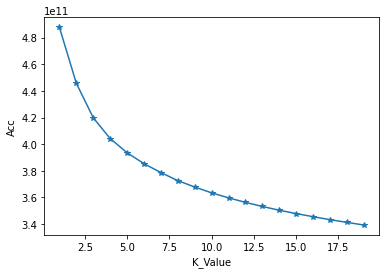

In [76]:
# Plot between Acc and K value.
# X_Axis = K value
# Y_Axis = SSE
import matplotlib.pyplot as plt
plt.plot(range(1,20),SSE,'*-')
plt.xlabel("K_Value")
plt.ylabel("Acc")
# As the steepness between the k value of 7 and 9 changes significantly k value or number of cluster is chosen to be 8.

# Kmeans

In [90]:
kmeans = KMeans(n_clusters=13)
kmeans.fit(data)

KMeans(n_clusters=13)

In [91]:
import pickle

In [92]:
# save the model to disk
filename = 'Kmeans_CL_5_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [121]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])


print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([206327, 233466, 212185, 221690, 220351, 188005, 206223, 219951,
       200455, 212319, 221470, 238461, 216262], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])) 



In [122]:
#folder1=r"D:/StrData/Str"
#folder2=r"D:\StrData\Nstr"

# Predicting and normalizing predictions

### Positive predictions

In [123]:
#performing kmeans prediction of the entire Staircase dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=1
j=0
data=[]
k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(430,280)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    orb = cv2.ORB_create()
    
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    j=j+1
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    print("feature vector of  ",j," : ", hist[0])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    k=k+1
    
norm = Normalizer()
normalized = norm.fit_transform(data)                   # normalize the histogram 

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:\\Users\\Administrator\\Desktop\\college\\TY\\Sem2\\CV\\CP\\kmeans-final-P-img.csv', mode='a',header=False,index=False)

feature vector of   1  :  [ 22  29   5  35 169  18  56  41  19  29  41  25   8]
feature vector of   2  :  [27 63 35 48 16 38 33 45 28 52 56 22 34]
feature vector of   3  :  [13 30 27 47 91 29 66 56 26 43 39 19 14]
feature vector of   4  :  [29 61 47 30 11 30 33 60 41 35 27 40 56]
feature vector of   5  :  [ 7 74 59 30 12 27 39 39 25 23 16 89 57]
feature vector of   6  :  [34 48 23 39 57 17 27 77 47 37 26 36 28]
feature vector of   7  :  [22 50 37 39 44 31 34 46 36 43 25 52 40]
feature vector of   8  :  [43 29 24 39 17 45 27 36 44 62 31 40 51]
feature vector of   9  :  [24 42 41 39 21 40 34 50 44 39 21 57 48]
feature vector of   10  :  [24 65 46 20 27 34 30 27 44 26 33 68 49]
feature vector of   11  :  [21 47 65 49  9 29 32 37 44 34 12 66 54]
feature vector of   12  :  [37 58 60 34 10 31 27 46 47 25 24 53 43]
feature vector of   13  :  [29 47 66 61  0 37 26 39 45 35 16 45 54]
feature vector of   14  :  [35 52 62 45 12 28 32 24 28 46 18 48 61]
feature vector of   15  :  [19 48 34 35 34 4

feature vector of   121  :  [23 42 33 44 26 44 49 43 28 50 21 44 53]
feature vector of   122  :  [27 34 38 39 28 27 44 40 39 62 27 52 43]
feature vector of   123  :  [39 30 63 44 11 32 36 53 24 35 43 32 58]
feature vector of   124  :  [35 16 44 37 12 45 32 32 34 42 30 23 46]
feature vector of   125  :  [22 38 32 41 61 35 67 30 19 49 36 39 31]
feature vector of   126  :  [30 15 51 51 24 45 74 41 22 34 24 34 54]
feature vector of   127  :  [31 36 41 56 33 43 40 27 42 29 25 42 48]
feature vector of   128  :  [29 25 62 55 11 37 36 53 25 32 42 40 53]
feature vector of   129  :  [40 65 40 45 19 30 25 51 32 53 22 39 39]
feature vector of   130  :  [30 52 62 43 15 56 44 38 22 28 26 35 49]
feature vector of   131  :  [26 91 14 27 69 21 43 26 38 36 34 43 22]
feature vector of   132  :  [31 62 24 20 92 20 65 32 39 12 30 46 16]
feature vector of   133  :  [35 56 30 38 41 37 39 42 32 38 20 53 39]
feature vector of   134  :  [19 32 32 35 13 42 42 82 46 32 21 30 74]
feature vector of   135  :  [28 53

feature vector of   240  :  [15 96 37 30 12 33 36 55 28 42 15 50 47]
feature vector of   241  :  [19 70 51 34  5 29 24 36 24 44 21 68 75]
feature vector of   242  :  [14 78 63 33 27 34 38 24 22 30 53 49 35]
feature vector of   243  :  [10 46 69 45 29 49 36 32 28 42 13 57 44]
feature vector of   244  :  [14 43 49 30 34 38 24 38 39 52 18 72 49]
feature vector of   245  :  [13 58 64 32 28 36 27 37 30 43 19 56 57]
feature vector of   246  :  [17 54 17 41 68 31 43 42 19 36 29 67 32]
feature vector of   247  :  [22 69 36 29 11 40 46 29 34 54 26 66 38]
feature vector of   248  :  [34 41 38 42 20 40 19 88 29 33 31 44 41]
feature vector of   249  :  [26 31 38 55 56 39 33 47 28 33 29 40 45]
feature vector of   250  :  [10 27 60 51 45 22 32 34 22 65 31 58 43]
feature vector of   251  :  [12 72 42 49 22 50 49 20 20 32 23 63 46]
feature vector of   252  :  [35 33 44 56 21 46 32 36 42 32 28 49 46]
feature vector of   253  :  [12 66 36 20 74 26 21 36 21 39 18 70 56]
feature vector of   254  :  [22 64

feature vector of   360  :  [44 35 20 76 14 48 33 20 34 23 27 55 35]
feature vector of   361  :  [19 65 33 35 26 46 40 34 16 41 26 77 41]
feature vector of   362  :  [14 94 49 53  5 29 24 38 19 37  5 63 70]
feature vector of   363  :  [33 42 43 37 41 34 31 47 24 33 15 59 61]
feature vector of   364  :  [36 43 44 45 29 31 29 35 31 34 22 64 57]
feature vector of   365  :  [15 66 19 37 54 31 33 46 25 28 19 72 45]
feature vector of   366  :  [25 60 34 35 31 35 37 50 27 40 10 53 62]
feature vector of   367  :  [15 79 57 38 10 24 27 47 33 30  9 71 60]
feature vector of   368  :  [  5  44  29  42 105  37  37  18  14  47  17  52  41]
feature vector of   369  :  [ 13 108  40  39  32  23  36  43  28  26   7  63  42]
feature vector of   370  :  [33 26 34 40 20 42 31 39 49 59 43 32 37]
feature vector of   371  :  [ 15  35  35  19 102  18  55  46  25  36  58  32  23]
feature vector of   372  :  [32 38 55 30 12 35 24 61 44 41 30 46 37]
feature vector of   373  :  [31 15 35 41 28 40 33 49 33 41 46 44

feature vector of   478  :  [11 41 63 36 27 21 56 33 31 35 33 58 48]
feature vector of   479  :  [17 44 43 55 21 62 42 33 30 29 22 35 67]
feature vector of   480  :  [31 45 46 51 31 43 52 42 40 34 29 33 23]
feature vector of   481  :  [36 19 46 44 18 51 47 28 75 46 32 22 35]
feature vector of   482  :  [15 54 47 49 49 22 30 54 34 22 27 43 49]
feature vector of   483  :  [40 43 20 45 50 36 21 52 22 30 73 34 16]
feature vector of   484  :  [34 54 27 67 41 36 29 27 24 21 34 47 54]
feature vector of   485  :  [33 47 40 66 30 43 35 36 23 35 16 33 63]
feature vector of   486  :  [32 60 61 33  8 29 45 42 35 32 15 60 48]
feature vector of   487  :  [18 37 62 38 16 19 39 33 31 38 37 51 68]
feature vector of   488  :  [19 69 55 29 12 26 32 35 34 32 16 82 58]
feature vector of   489  :  [18 54 64 32  7 46 45 38 26 30 18 44 69]
feature vector of   490  :  [15 69 47 35  7 39 27 35 25 44 21 65 63]
feature vector of   491  :  [22 48 46 44 20 35 36 32 37 39 10 73 58]
feature vector of   492  :  [60 18

feature vector of   596  :  [26 65 37 32 24 12 27 56 29 54 18 71 49]
feature vector of   597  :  [22 41 75 31 37 13 32 36 34 36 11 57 75]
feature vector of   598  :  [14 61 80 26 21 22 23 53 24 29 12 80 52]
feature vector of   599  :  [15 61 58 27 20 16 35 78 25 35 12 75 42]
feature vector of   600  :  [20 54 52 26 23 24 27 60 20 31 18 89 53]
feature vector of   601  :  [27 80 41 41 37 24 41 48 26 38  7 50 40]
feature vector of   602  :  [12 55 53 34 26 33 42 84 26 26  3 67 39]
feature vector of   603  :  [48 26 39 23 11 50 27 14 53 61 36 51 60]
feature vector of   604  :  [13 67 47 15 58 15 30 50 29 33 16 80 47]
feature vector of   605  :  [36 53 39 48 13 36 36 29 25 49 19 65 52]
feature vector of   606  :  [35 47 33 31 91 31 40 45 46 23 29 35 12]
feature vector of   607  :  [15 75 52 28 47 16 44 59 25 31  2 66 40]
feature vector of   608  :  [15 55 56 30 36 29 39 42 27 41 16 68 46]
feature vector of   609  :  [32 61 55 36 14 30 22 33 35 46 17 66 53]
feature vector of   610  :  [11 66

feature vector of   716  :  [23 41 62 36 11 30 51 39 41 42 17 62 45]
feature vector of   717  :  [18 81 74 38  7 20 21 30 24 31 11 72 65]
feature vector of   718  :  [10 73 60 61  4 25 25 42 28 34 13 62 63]
feature vector of   719  :  [16 63 59 34 17 29 42 37 35 37 11 60 60]
feature vector of   720  :  [29 61 61 44 11 16 28 42 30 34 23 78 43]
feature vector of   721  :  [33 60 56 29 16 26 48 46 30 43 13 50 50]
feature vector of   722  :  [16 78 68 35 21 14 28 53 33 27  8 74 45]
feature vector of   723  :  [28 37 60 32  3 32 27 46 30 43 26 80 56]
feature vector of   724  :  [32 53 55 36  7 42 27 47 24 21 30 66 60]
feature vector of   725  :  [55 24 42 59 30 38 24 48 27 32 20 47 49]
feature vector of   726  :  [17 56 63 33  7 36 45 33 31 28  7 84 60]
feature vector of   727  :  [21 34 28 36 40 41 30 68 40 37 34 40 51]
feature vector of   728  :  [25 55 52 44 16 33 36 31 31 51 36 28 62]
feature vector of   729  :  [47 63 36 18 39 25 31 23 25 53 47 45 33]
feature vector of   730  :  [28 38

feature vector of   834  :  [12 69 57 29 19 40 31 38 27 45 11 62 60]
feature vector of   835  :  [22 81 30 38 16 30 36 34 28 44 19 66 56]
feature vector of   836  :  [17 46 63 55 12 31 42 31 38 39 33 53 40]
feature vector of   837  :  [17 65 59 23 18 47 41 39 20 36 16 56 63]
feature vector of   838  :  [15 75 44 26 44 18 19 29 27 43 17 81 61]
feature vector of   839  :  [24 62 65 44  8 29 33 32 37 28 20 53 65]
feature vector of   840  :  [55 23 17 42 23 38 47 24 47 47 42 13 44]
feature vector of   841  :  [24 79 51 25  4 24 28 28 32 53 20 64 68]
feature vector of   842  :  [ 9 88 52 35 12 33 27 45 20 30 14 80 55]
feature vector of   843  :  [17 75 57 44  8 23 24 25 25 36 15 92 59]
feature vector of   844  :  [27 65 35 24 26 33 30 59 36 31 24 67 40]
feature vector of   845  :  [29 89 48 33  4 29 28 40 54 23 15 61 47]
feature vector of   846  :  [19 63 53 40  8 32 37 49 32 38 19 56 54]
feature vector of   847  :  [37 42 64 42 14 32 25 47 42 37 22 55 41]
feature vector of   848  :  [33 61

feature vector of   952  :  [19 65 25 36 38 36 50 40 29 47 21 36 58]
feature vector of   953  :  [12 85 39 33 25 24 32 41 46 33 23 53 54]
feature vector of   954  :  [18 50 35 51 27 25 40 63 34 33 23 52 49]
feature vector of   955  :  [15 56 43 31 26 39 33 51 38 47 18 45 58]
feature vector of   956  :  [21 72 40 53 32 27 36 48 40 39 19 38 35]
feature vector of   957  :  [14 53 36 38 21 39 57 44 28 41 10 65 54]
feature vector of   958  :  [33 23 34 50  8 63 28 21 47 56 27 38 72]
feature vector of   959  :  [24 52 50 30 24 32 61 28 20 43  9 53 74]
feature vector of   960  :  [21 53 47 35 35 29 36 32 34 48 15 51 64]
feature vector of   961  :  [16 48 49 27 58 17 56 33 33 33 28 52 50]
feature vector of   962  :  [10 44 40 31 66 30 44 38 25 53 38 42 39]
feature vector of   963  :  [ 6 60 29 27 40 29 53 61 28 47 35 37 41]
feature vector of   964  :  [ 8 45 35 29 48 23 47 32 27 41 30 83 52]
feature vector of   965  :  [10 52 39 15 50 13 42 23 21 56 43 78 58]
feature vector of   966  :  [12 40

feature vector of   1068  :  [20 84 49 37 26 15 31 30 37 26 19 73 53]
feature vector of   1069  :  [32 21 50 49  8 51 33 16 36 41 47 37 79]
feature vector of   1070  :  [20 67 51 41 18 28 39 26 32 45 12 74 47]
feature vector of   1071  :  [18 90 46 28 25 27 27 32 32 42 23 64 46]
feature vector of   1072  :  [25 90 47 28 15 30 28 35 15 43 17 73 54]
feature vector of   1073  :  [13 51 35 42 29 40 34 33 34 29 16 82 61]
feature vector of   1074  :  [18 95 51 37 30 33 25 25 20 23  9 69 55]
feature vector of   1075  :  [14 67 58 38 25 27 32 39 35 32 14 68 51]
feature vector of   1076  :  [14 62 46 31 12 29 27 41 19 53 18 73 72]
feature vector of   1077  :  [18 63 48 33  9 24 39 22 28 42 10 79 84]
feature vector of   1078  :  [14 52 49 34 12 39 39 24 26 36  9 84 82]
feature vector of   1079  :  [18 45 52 54 32 28 44 22 24 37 10 62 72]
feature vector of   1080  :  [56 25 48 51  9 54 17 28 40 32 33 26 81]
feature vector of   1081  :  [28 52 46 34 45 24 42 44 22 43 29 42 36]
feature vector of   

feature vector of   1186  :  [32 33 43 27 16 28 40 63 39 42 18 62 53]
feature vector of   1187  :  [24 73 14 40 67 31 45 67 23 24 26 28 29]
feature vector of   1188  :  [14 76 33 40 19 22 64 46 33 34 11 57 47]
feature vector of   1189  :  [14 89 22 28 21 27 72 41 30 30  8 66 52]
feature vector of   1190  :  [14 55 51 29 54 32 36 22 17 42 50 49 46]
feature vector of   1191  :  [20 75 24 32 47 28 52 60 30 30 11 51 38]
feature vector of   1192  :  [23 39 26 48 50 41 39 44 50 41 34 28 26]
feature vector of   1193  :  [ 11  45  25  32 136   8  50  56  21   9  21  54  31]
feature vector of   1194  :  [12 36 19 41 74 29 64 49 26 55 24 45 26]
feature vector of   1195  :  [26 30 31 37 37 36 60 51 43 31 23 42 45]
feature vector of   1196  :  [15 73 52 26 38 23 32 31 35 42 18 64 51]
feature vector of   1197  :  [24 45 50 23 47 26 40 58 29 35 27 54 37]
feature vector of   1198  :  [45 42 31 51 42 39 27 47 26 32 38 38 34]
feature vector of   1199  :  [28 36 24 34 74 22 54 46 17 51 32 39 33]
feature

feature vector of   1304  :  [21 68 18 43 69 21 43 60 23 34 26 51 23]
feature vector of   1305  :  [ 13  28  32  79 100  44  37  35  17  29  28  28  29]
feature vector of   1306  :  [30 30 24 32 53 36 37 68 28 40 30 45 43]
feature vector of   1307  :  [34 36 47 44 52 33 25 54 14 35 34 53 35]
feature vector of   1308  :  [27 31 28 51 72 44 75 23 20 37 43 17 32]
feature vector of   1309  :  [47 33 70 55  4 30 33 20 43 39 41 34 51]
feature vector of   1310  :  [32 54 32 29 46 36 41 38 37 51 21 37 32]
feature vector of   1311  :  [19 66 52 40 17 41 35 32 20 28 22 66 62]
feature vector of   1312  :  [13 62 55 41 19 22 23 34 32 50 24 69 55]
feature vector of   1313  :  [20 51 36 32 66 50 35 28 14 42 28 53 36]
feature vector of   1314  :  [ 14  17  28  33 117  28  57  26  28  31  31  28  26]
feature vector of   1315  :  [13 46 47 26 68 40 47 31 30 46 22 40 42]
feature vector of   1316  :  [26 43 43 50 31 60 31 35 23 59 34 34 31]
feature vector of   1317  :  [15 50 46 40 17 29 49 41 36 39 33 4

feature vector of   1420  :  [24 13 28 49 64 27 48 62 27 49 20 38 39]
feature vector of   1421  :  [42 19 31 41 24 46 52 35 32 41 46 45 46]
feature vector of   1422  :  [42 42 33 38 92 24 23 41 42 43 34 25 13]
feature vector of   1423  :  [64 20 68 38 19 30 24 31 36 36 68 30 36]
feature vector of   1424  :  [75 23 48 62 32 45 13 36 24 36 42 28 36]
feature vector of   1425  :  [26 60 59 31 41 33 33 30 29 30 16 38 61]
feature vector of   1426  :  [29 71 42 27 24 26 39 33 31 48 25 51 46]
feature vector of   1427  :  [35 60 52 39 10 33 30 47 28 35 20 47 55]
feature vector of   1428  :  [42 13 22 41 31 35 39 34 45 44 61 26 26]
feature vector of   1429  :  [32 21 33 47 72 27 44 21 37 44 46 31 35]
feature vector of   1430  :  [23 40 54 53  6 40 24 50 38 33 35 39 65]
feature vector of   1431  :  [36 52 31 46 34 41 50 62 16 27 35 36 26]
feature vector of   1432  :  [49 24 19 50 65 40 39 52 27 39 54 12 21]
feature vector of   1433  :  [24 27 31 42 50 39 38 85 30 28 33 38 33]
feature vector of   

feature vector of   1534  :  [ 25  50  12  25 102  38  35  74  28  14  18  34  21]
feature vector of   1535  :  [ 36  31   8  15 127  28  28  35  27  23  49  47  17]
feature vector of   1536  :  [20 61 49 47 15 43 48 39 25 37 23 34 59]
feature vector of   1537  :  [39 52 42 37 12 36 36 34 33 45 45 31 55]
feature vector of   1538  :  [21 76 51 48  4 25 24 47 24 48 14 58 49]
feature vector of   1539  :  [21 23 35 35 24 33 36 33 45 65 37 28 53]
feature vector of   1540  :  [27 61 53 34 33 32 40 34 33 19 16 59 49]
feature vector of   1541  :  [ 44  15  18  62 120  34  32  47  21  23  21  21  27]
feature vector of   1542  :  [13 67 39 47 42 35 26 33 23 28 19 65 49]
feature vector of   1543  :  [ 6 78 55 32 38 19 32 32 15 46  6 68 60]
feature vector of   1544  :  [19 62 44 46 35 34 27 32 28 41 14 61 44]
feature vector of   1545  :  [16 52 36 30 64 29 53 24 29 45 23 50 34]
feature vector of   1546  :  [44 65 59 50 20 21 26 28 23 19 27 55 57]
feature vector of   1547  :  [16 58 70 37  9 32 26 

feature vector of   1650  :  [52 38 18 47 21 40 57 35 40 30 55 21 28]
feature vector of   1651  :  [  2  39  31  22 121  21  63  23   9  32  38  47  29]
feature vector of   1652  :  [  5  64  33   9 108  13  37  39  28  41  41  38  30]
feature vector of   1653  :  [  8  25  22  26 127  28  58  49  14  30  41  35  27]
feature vector of   1654  :  [ 25  25  11  23 110  45  74  47  18  40  47  10  20]
feature vector of   1655  :  [31 38 19 47 77 34 53 38 13 37 58 13 34]
feature vector of   1656  :  [23 50 30 31 76 36 37 28 17 42 55 24 41]
feature vector of   1657  :  [25 47 32 35 56 29 43 28 36 47 44 22 51]
feature vector of   1658  :  [31 36 37 29 24 32 30 34 36 61 39 42 69]
feature vector of   1659  :  [ 47  32  24  30 124  29  33  59  27  14  23  20  23]
feature vector of   1660  :  [20 58 48 34 62 20 26 49 14 36 51 39 39]
feature vector of   1661  :  [ 18  26  25  49 116  25  52  32  19  37  46  30  18]
feature vector of   1662  :  [16 55 67 36  9 25 44 67 35 37 13 61 35]
feature vect

feature vector of   1766  :  [62 12 18 22 96 11 66 48 43 38 40 21 11]
feature vector of   1767  :  [28 46 20 56 82 17 29 58 43 23 24 35 22]
feature vector of   1768  :  [24 49 33 45 70 24 47 37 45 22 18 43 25]
feature vector of   1769  :  [27 13 28 54 43 42 49 58 32 44 19 48 40]
feature vector of   1770  :  [12 35 39 36 33 57 54 19 37 39 30 38 54]
feature vector of   1771  :  [24 29 54 42 24 57 24 25 27 53 42 33 55]
feature vector of   1772  :  [ 18  39  17  24 112  25  41  68  40  19  37  33  24]
feature vector of   1773  :  [16 52 56 22 52 44 27 31 31 23 24 56 43]
feature vector of   1774  :  [18 27 41 49 10 41 36 39 48 47 54 29 45]
feature vector of   1775  :  [27 69 64 56 11 23 26 31 29 34 20 55 55]
feature vector of   1776  :  [26 69 48 41 10 32 27 35 35 24 18 73 62]
feature vector of   1777  :  [36 62 32 42 22 19 33 68 39 47 25 38 36]
feature vector of   1778  :  [26 62 14 34 40 23 35 51 37 53 54 44 22]
feature vector of   1779  :  [ 9 72 38 42 52 36 51 30 19 44 22 30 41]
feature

feature vector of   1882  :  [21 32 48 60 19 39 38 33 38 26 27 55 64]
feature vector of   1883  :  [25 38 34 56 32 39 53 29 19 44 43 44 42]
feature vector of   1884  :  [39 40 46 28 71 20 41 42 23 25 56 31 27]
feature vector of   1885  :  [12 30 37 41 69 42 38 31 21 48 23 48 38]
feature vector of   1886  :  [14 49 45 31 40 44 45 30 33 38 31 43 40]
feature vector of   1887  :  [56 11 23 46 28 37 27 23 55 73 50 18 42]
feature vector of   1888  :  [42 71 53 51 15 39 24 34 21 23 13 65 48]
feature vector of   1889  :  [33 24 36 31 78 33 34 28 25 55 24 43 48]
feature vector of   1890  :  [ 26   8   9  22 231  25  69  27   4  12  26   7  10]
feature vector of   1891  :  [42 18 25 59 62 27 39 38 41 29 49 44 20]
feature vector of   1892  :  [44 16 33 52 35 26 24 47 34 50 52 32 46]
feature vector of   1893  :  [61 38 32 63 15 24 39 45 37 31 54 24 26]
feature vector of   1894  :  [29 30 18 41 73 35 29 53 27 36 38 30 43]
feature vector of   1895  :  [14 69 49 26 46 20 32 68 25 12 14 66 43]
feature

feature vector of   1998  :  [30 32 28 48 30 39 41 39 46 45 56 31 35]
feature vector of   1999  :  [37 51 57 58 10 37 34 14 16 47 46 57 34]
feature vector of   2000  :  [27 48 59 32 10 41 17 41 56 47 35 41 46]
feature vector of   2001  :  [25 56 51 45 11 37 22 59 39 38 16 52 49]
feature vector of   2002  :  [33 12 31 66 46 46 35 41 41 36 57 21 29]
feature vector of   2003  :  [32 29 31 40 49 32 47 37 24 48 33 37 48]
feature vector of   2004  :  [50 36 32 45 26 40 38 42 48 31 32 36 44]
feature vector of   2005  :  [13 80 56 27 12 35 28 51 31 31 20 68 48]
feature vector of   2006  :  [26 45 51 64 11 26 30 48 32 38 20 55 53]
feature vector of   2007  :  [27 14 32 49 31 37 46 44 38 65 31 35 51]
feature vector of   2008  :  [31 27 34 24 31 48 29 37 48 33 51 19 27]
feature vector of   2009  :  [33 60 50 37 13 28 24 59 30 37 22 52 55]
feature vector of   2010  :  [35 50 52 55 25 33 35 48 27 45 24 39 32]
feature vector of   2011  :  [31 29 44 60 28 30 27 38 54 32 29 52 46]
feature vector of   

feature vector of   2116  :  [25 21 56 38 15 48 44 51 33 44 26 35 64]
feature vector of   2117  :  [41 49 51 55  5 34 30 43 34 34 24 43 57]
feature vector of   2118  :  [17 80 63 52  7 33 22 35 28 35  6 78 44]
feature vector of   2119  :  [32 37 46 52 25 53 28 19 30 50 36 38 50]
feature vector of   2120  :  [26 17 23 47 77 33 61 42 35 47 35 27 28]
feature vector of   2121  :  [43 26 20 65 49 31 50 29 27 44 49 33 24]
feature vector of   2122  :  [20 44 32 45 32 23 51 34 13 53 29 40 41]
feature vector of   2123  :  [58 11 33 62 20 53 34 20 35 47 50 31 46]
feature vector of   2124  :  [57 31 37 47 14 41 19 32 44 48 57 19 54]
feature vector of   2125  :  [36 34 38 52 25 40 20 54 34 32 28 59 48]
feature vector of   2126  :  [28 38 83 50  9 39 29 27 26 36 22 64 49]
feature vector of   2127  :  [22 59 38 56 18 41 49 37 23 30 50 24 53]
feature vector of   2128  :  [34 52 67 50 25 36 22 25 30 27 23 49 60]
feature vector of   2129  :  [43 52 60 28 28 30 25 39 32 35 23 41 64]
feature vector of   

feature vector of   2234  :  [41 28 40 43 13 36 22 39 29 54 69 41 41]
feature vector of   2235  :  [16 67 47 29 48 29 22 20 22 41  9 90 51]
feature vector of   2236  :  [11 80 52 32 48 34 26 25 17 30 11 76 54]
feature vector of   2237  :  [32 37 46 52 25 53 28 19 30 50 36 38 50]
feature vector of   2238  :  [27 47 40 47  5 38 37 51 45 43 32 40 48]
feature vector of   2239  :  [21 57 17 27 61 27 35 70 30 28 27 63 26]
feature vector of   2240  :  [ 6 86 43 39 15 27 57 48 27 35 14 55 43]
feature vector of   2241  :  [30 24 40 37 27 35 34 47 27 53 38 44 56]
feature vector of   2242  :  [ 15  53  14  29 123  17  31  49  14  35  37  43  34]
feature vector of   2243  :  [57 45 27 30 47 26 36 55 21 41 42 31 42]
feature vector of   2244  :  [20 80 38 27 50 21 37 39 26 35 14 70 36]
feature vector of   2245  :  [24 48  9 32 62 28 56 72 24 35 44 32 26]
feature vector of   2246  :  [28 48 36 28 57 35 56 35 32 39 21 26 47]
feature vector of   2247  :  [61 17 21 35 88 26 38 28 26 45 67 17 17]
feature

feature vector of   2350  :  [35 31 38 51 16 43 41 40 35 51 39 29 31]
feature vector of   2351  :  [31 33 26 61  9 19 23 34 53 55 22 55 42]
feature vector of   2352  :  [32 46 16 52 51 38 31 51 43 29 21 40 29]
feature vector of   2353  :  [31 23 31 70 40 37 36 27 30 23 23 48 35]
feature vector of   2354  :  [16 14 18 62 53 41 67 50 45 38 31 13 41]
feature vector of   2355  :  [22 14 15 47 66 29 51 16 30 24 52 37 41]
feature vector of   2356  :  [67  2 37 47 63 24 26 10 47 26 48  9 31]
feature vector of   2357  :  [28 13 26 42 37 12 34 36 29 34 61 40 43]
feature vector of   2358  :  [35 14 29 60 38 28 57 13 45 44 49 28 29]
feature vector of   2359  :  [28 52 44 39 41 20 43 29 26 33 42 62 38]
feature vector of   2360  :  [24 27 12 47 38 36 40 29 28 65 42 33 37]
feature vector of   2361  :  [18 64 40 22 34 26 37 77 34 45 31 36 25]
feature vector of   2362  :  [37 26 18 45 56 40 51 19 23 36 44 29 29]
feature vector of   2363  :  [28 31 46 41 22 48 48 34 36 30 33 26 42]
feature vector of   

feature vector of   2468  :  [76 13 33 39 17 31 19 33 74 33 35 33 28]
feature vector of   2469  :  [36 59 27 27 25 30 19 52 25 32 36 54 42]
feature vector of   2470  :  [42 33 55 41 29 51 20 38 50 19 43 51 28]
feature vector of   2471  :  [39 24 31 24 30 37 27 72 60 33 17 38 37]
feature vector of   2472  :  [21 84 41 28 67 16 20 43 22 18 31 66 33]
feature vector of   2473  :  [55 12 16 37 31 27 20 38 89 28 40 21 41]
feature vector of   2474  :  [87 18 21 38 39 43 23 28 50 37 52 17 28]
feature vector of   2475  :  [108   8   5  55  57   5  26  64  44  29  21   6  22]
feature vector of   2476  :  [62 19 15 59 26 27 28 63 85 28 23 18 10]
feature vector of   2477  :  [66 38 34 31  9 25 27 28 58 46 41 27 35]
feature vector of   2478  :  [79 19 19 86 50 20 14 51 55 15 23 22 22]
feature vector of   2479  :  [46 38 34 23 18 26 26 41 64 43 40 43 39]
feature vector of   2480  :  [76 41 37 59 19 18 14 32 30 12 33 49 41]
feature vector of   2481  :  [45 22 42 46 11 39 25 36 49 50 28 44 63]
feature

feature vector of   2584  :  [38 28 41 40 22 35 21 49 26 60 35 45 50]
feature vector of   2585  :  [38 36 24 60 34 31 47 44 34 29 49 18 35]
feature vector of   2586  :  [42 12 42 57 15 36 31 35 50 59 37 25 38]
feature vector of   2587  :  [53 12 41 38 19 32 47 27 48 50 43 23 35]
feature vector of   2588  :  [41 37 53 52 13 43 33 32 33 36 23 25 57]
feature vector of   2589  :  [35 53 23 38 16 55 35 34 46 34 25 45 46]
feature vector of   2590  :  [47 34 51 39  7 25 34 45 54 40 16 40 50]
feature vector of   2591  :  [73 23 28 55 11 43 23 29 45 38 34 34 59]
feature vector of   2592  :  [26 62 42 37 15 13 37 48 37 23 13 99 48]
feature vector of   2593  :  [64 19 41 52 19 39 21 19 24 37 49 44 62]
feature vector of   2594  :  [23 37 40 60 50 38 81 36 21 15 28 34 10]
feature vector of   2595  :  [27 21 28 25 92 29 59 35 18 40 43 31 33]
feature vector of   2596  :  [50 20 27 39 22 43 38 33 46 32 66 31 34]
feature vector of   2597  :  [37 28 33 38 54 23 42 45 33 37 43 30 37]
feature vector of   

feature vector of   2702  :  [36 37 56 51  5 28 35 22 56 45 35 41 50]
feature vector of   2703  :  [31 44 53 46 27 27 32 37 34 31 17 54 67]
feature vector of   2704  :  [36 41 68 29  9 27 25 27 50 55 34 51 48]
feature vector of   2705  :  [41 32 34 36 13 32 21 24 56 56 42 48 63]
feature vector of   2706  :  [26 66 43 44 13 42 43 37 20 32 40 43 51]
feature vector of   2707  :  [39 50 45 36 26 20 36 36 41 34 49 54 29]
feature vector of   2708  :  [47 47 25 33 69 21 28 48 29 26 37 41 26]
feature vector of   2709  :  [ 23   8  13  17 149  36  69  18  62  27  46  16   4]
feature vector of   2710  :  [60 21 20 18 65 30 46 40 55 16 80 21 23]
feature vector of   2711  :  [88 16 24 29 38 57 58 44 30 24 55 21 15]
feature vector of   2712  :  [55 22 11 40 43 42 50 46 41 38 79 10 23]
feature vector of   2713  :  [42 13 37 39 59 29 41 43 63 47 48  8 15]
feature vector of   2714  :  [11 39 54 34 34 30 44 28 30 39 37 66 54]
feature vector of   2715  :  [82 30  6 20 61 34 37 37 49 18 61 26 18]
feature

feature vector of   2818  :  [31 35 41 57 16 35 50 44 34 41 30 39 47]
feature vector of   2819  :  [27 33 32 74 13 34 39 54 40 43 46 34 31]
feature vector of   2820  :  [41 31 25 59 24 40 32 42 49 46 39 35 37]
feature vector of   2821  :  [52 17 44 58 18 52 43 31 28 52 34 24 47]
feature vector of   2822  :  [55 20 31 60 26 30 49 34 39 45 43 43 25]
feature vector of   2823  :  [32 29 55 48 21 32 36 26 48 33 36 52 52]
feature vector of   2824  :  [39 33 29 39 17 30 51 39 71 43 27 42 40]
feature vector of   2825  :  [36 22 41 67  7 49 31 26 46 41 34 43 39]
feature vector of   2826  :  [76 22 35 46 19 27 30 30 77 39 36 29 34]
feature vector of   2827  :  [85 19 33 43 18 19 37 28 68 32 40 43 30]
feature vector of   2828  :  [12 83 65 51 46 18 21 43 20 21 10 48 55]
feature vector of   2829  :  [85 23 20 32 24 28 35 47 56 33 45 33 39]
feature vector of   2830  :  [73 32 28 55 15 24 30 35 47 40 52 32 31]
feature vector of   2831  :  [63 25 33 35 21 28 51 24 68 39 54 26 33]
feature vector of   

feature vector of   2934  :  [ 8 68 55 43  1 28 27 26 26 32 22 76 86]
feature vector of   2935  :  [ 7 67 42 37 20 34 42 29 33 31 12 93 53]
feature vector of   2936  :  [32 66 84 29  4 26 25 38 35 18 12 69 47]
feature vector of   2937  :  [  7 118  43  30  16  36  24  24  19  22   8 114  39]
feature vector of   2938  :  [29 43 27 36 42 40 31 25 38 54 33 46 56]
feature vector of   2939  :  [51 33 31 45 37 34 32 35 39 12 50 34 39]
feature vector of   2940  :  [60 60 43 26  6 28 30 49 43 47 18 41 49]
feature vector of   2941  :  [26 53 58 34 15 37 45 19 44 38 19 65 39]
feature vector of   2942  :  [10 94 55 44  5 25 18 44 26 28  4 82 62]
feature vector of   2943  :  [26 41 33 43 18 46 40 36 29 60 40 38 42]
feature vector of   2944  :  [25 83 39 45  9 28 33 34 19 23 13 81 68]
feature vector of   2945  :  [34 49 34 45 30 24 37 37 30 44 41 50 45]
feature vector of   2946  :  [13 78 54 32  4 32 39 16 26 39 14 94 59]
feature vector of   2947  :  [ 23 105  64  27   2  26  20  58  25  27  18  54

### Neagtive Predictions

In [125]:
#performing kmeans prediction of the entire Non_Staircase dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=0
j=0
data=[]
k=0
for filename in os.listdir(folder2):
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    resize=(430,280)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    j=j+1
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    print("feature vector of  ",j," : ", hist[0])
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    k=k+1

norm = Normalizer()
normalized = norm.fit_transform(data)                   # normalize 

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:\\Users\\Administrator\\Desktop\\college\\TY\\Sem2\\CV\\CP\\kmeans-final-N-img.csv', mode='a',header=False,index=False)

feature vector of   1  :  [31 46 27 21 74 15 35 61 28 33 53 39 15]
feature vector of   2  :  [ 16  28  15  32 148  28  31  23   9  15  10  33  21]
feature vector of   3  :  [31  3 15 42 69 38 48 14 31 79 66  7 19]
feature vector of   4  :  [48 36 12 32 83 24 53 55 24 26 54 25 10]
feature vector of   5  :  [29 30 25 54 28 51 32 38 43 42 18 48 58]
feature vector of   6  :  [22 59 36 36 25 37 35 59 46 45 20 39 34]
feature vector of   7  :  [24 26 41 46 36 33 42 42 37 33 60 26 36]
feature vector of   8  :  [22 69 39 34 51 34 30 34 40 37 28 47 35]
feature vector of   9  :  [76 23 37 32  9 36 31 27 71 51 40 16 42]
feature vector of   10  :  [12 38 60 13 28 27 35 22 52 38 30 55 38]
feature vector of   11  :  [14 79 38 44  5 27 34 32 27 46 11 45 73]
feature vector of   12  :  [16 45 46 46 11 55 33 14 11 48 28 62 64]
feature vector of   13  :  [45  6 83 43  5 17 89  1 70  8 14 38 24]
feature vector of   14  :  [32 36 67 30  8 24 32 23 39 30 16 63 84]
feature vector of   15  :  [45 41 14 36 88 3

feature vector of   120  :  [54 22 27  4 35  6 14 17 28 10 23 40 13]
feature vector of   121  :  [ 98   9  26  52  30  34  15  26  22  28 111   8  18]
feature vector of   122  :  [87 11 73 22  1 21 13 16 43 27 39 43 15]
feature vector of   123  :  [49 17 26 36 14 44 45 12 17 35 31 32 15]
feature vector of   124  :  [66  4 32 29  5 60 27  8 65 17 97 17 21]
feature vector of   125  :  [38 35 39 26  5 40 20 28 39 36 20 42 78]
feature vector of   126  :  [37 24 38 40 19 63 33 26 18 49 51 41 42]
feature vector of   127  :  [32 45 63 15 17  6 40 20 44 12  5 64 49]
feature vector of   128  :  [23 50 31 50 20 43 22 24 44 45 16 35 65]
feature vector of   129  :  [21 54 93 25  2 17 44 18 33 13  6 85 56]
feature vector of   130  :  [29 48 65 26  5 26 15 30 51 25  9 59 84]
feature vector of   131  :  [67  0 22  2  0  3 10  1 27  3 23 24  0]
feature vector of   132  :  [42 41 50 19  1 24 28 38 49 19 27 39 33]
feature vector of   133  :  [85 13 28 53  7 35 21 22 41 50 62 37 26]
feature vector of   1

feature vector of   236  :  [43 11 34  5 28 13 12 25 25 14 52 34  5]
feature vector of   237  :  [42 44 27 40 42 39 38 42 15 43 26 50 26]
feature vector of   238  :  [27 51 40 23 43 28 34 37 29 38 13 69 42]
feature vector of   239  :  [22 36 39 35 30 63 25 18 37 33 43 36 27]
feature vector of   240  :  [20 41 87 48  9 24 37 17 21 39  9 90 47]
feature vector of   241  :  [43 14 41 21 66 34 10 32 51 53 48 15 24]
feature vector of   242  :  [ 23  60 107  29   0  18  17  21  15  41   6 104  43]
feature vector of   243  :  [75  0 15  2  1  6  4  1 40  4 12 12  2]
feature vector of   244  :  [33 34 52 39 14 40 38 26 44 37 48 42 53]
feature vector of   245  :  [53  0  6 10  0 12  2  1 12  7 28  4  5]
feature vector of   246  :  [22 31 26 48 11 46 52 37 31 55 15 51 47]
feature vector of   247  :  [43 40 71 25 28 24 21 38 54 25 39 34 47]
feature vector of   248  :  [18 46 39 44 37 33 37 45 17 35 24 42 34]
feature vector of   249  :  [56 24 29 36 16 26 36 37 37 37 52 58 38]
feature vector of   2

feature vector of   352  :  [60 11 60 53  4 39 15 19 50 25 28 62 35]
feature vector of   353  :  [81 12 19 32 17 25  2 23 43 17 81 17 19]
feature vector of   354  :  [39 22 39 83  9 33 36 25 42 36 26 32 67]
feature vector of   355  :  [31 12  5  1  0  9  1 10 11  7 42  1 14]
feature vector of   356  :  [55 26 55 45  7 36 21 38 36 38 50 36 45]
feature vector of   357  :  [43 36 37 53 16 32 39 34 47 23 31 42 59]
feature vector of   358  :  [29 47 58 31  5 35 23 45 64 28 16 40 62]
feature vector of   359  :  [ 12  16  18  41 134  18  36  63  19  28  26  15  31]
feature vector of   360  :  [117   1  16  30  19  41  11  19  62  46  95   3  13]
feature vector of   361  :  [25 53 25 36 56 24 22 33 55 66 17 44 22]
feature vector of   362  :  [82 36 56 25  4 33 31 25 46 17  6 69 33]
feature vector of   363  :  [60 33 69 37 19 39 29 27 36 35 17 51 19]
feature vector of   364  :  [87  6 24 57 15 53 39  8 49 31 89  4 29]
feature vector of   365  :  [88  5 27 31  2 38 14 17 42 21 68 23 31]
feature 

feature vector of   468  :  [62 10 17 42 14 63 32 12 46 88 76 14 24]
feature vector of   469  :  [67  0 13  4  1  3  3  7 40  3 33 10  1]
feature vector of   470  :  [ 26  19   8  30 141  31  36  45  12  29  55  19  23]
feature vector of   471  :  [54 26 37 40 12 46 37  7 49 56 46 23 33]
feature vector of   472  :  [50 15 78 19  9 17 19 14 62 14 23 47 33]
feature vector of   473  :  [26 22 20 41 15 55 53 30 33 48 47 18 47]
feature vector of   474  :  [14 71 59 32 42 30 35 42 23 41 14 44 28]
feature vector of   475  :  [42 14 39 35  2 78 29 25 44 50 72 14 38]
feature vector of   476  :  [34 28 52 52 16 45 32 25 29 37 28 37 39]
feature vector of   477  :  [ 2 75  6 35 57 58 13 57 18 35 13 36 32]
feature vector of   478  :  [78  5 54 32  4 29 19 17 55 54 39 58 25]
feature vector of   479  :  [60  3 44 22  0 55 23  7 23 10 67 26  9]
feature vector of   480  :  [ 11  66 108  18   8  11  15  13  14  12   0 163  48]
feature vector of   481  :  [25 25 18 46 44 46 63 31 22 50 44 24 34]
feature 

feature vector of   584  :  [11 72 89 35  2 33 25 26  9 32  4 73 52]
feature vector of   585  :  [21 70 54 32  2 19 22 26 46 49 11 81 50]
feature vector of   586  :  [118  17  39  27  11  24  36  19  31  38  32  52  31]
feature vector of   587  :  [34 24 52 37 15 13 36 20 33 34  9 59 29]
feature vector of   588  :  [20 67 60 25 17 38 23 22 26 18 11 82 48]
feature vector of   589  :  [34 62 44 37  8 52 49 20 30 32 26 48 50]
feature vector of   590  :  [28 52 59 51 21 39 32 35 37 23 27 37 59]
feature vector of   591  :  [75 10 43 46  6 40 21 22 56 40 59 18 45]
feature vector of   592  :  [ 26  11   8  48 135  47  57  16  13  35  42  10  24]
feature vector of   593  :  [51  2 33 11  2 31 12  5 17 11 28 39  6]
feature vector of   594  :  [38  6 60  1 10 24 12 25 58 22 29 19 20]
feature vector of   595  :  [42  0  7  9  6 13  4  1 47  8 20 14  2]
feature vector of   596  :  [44 17 35 37  6 63 29 33 50 60 49 20 57]
feature vector of   597  :  [55 12 24 59 29 59 28 21 38 47 80 23 21]
feature 

feature vector of   698  :  [33 20 41 52  6 50 48 37 52 38 38 22 37]
feature vector of   699  :  [43 41 35 43  6 37 48 22 33 49 28 62 53]
feature vector of   700  :  [33 32 76 37  3 36 28 22 29 45 18 75 50]
feature vector of   701  :  [49 10  9 13 40 15  5 35 31 42 22  9 10]
feature vector of   702  :  [20 46 52 26  6 33 35 33 23 29 23 78 64]
feature vector of   703  :  [ 25  53  43  46   6   9  15  53  36  39  10 100  62]
feature vector of   704  :  [51  2 24 17  0 17 16  1 22  5 15 27  3]
feature vector of   705  :  [66  0 31  4 24 14 20  5 83 20 26 10 13]
feature vector of   706  :  [53 20 30 45 14 58 38 17 38 60 42 43 29]
feature vector of   707  :  [45 22 10  3  4  9 10 14 30  5 10 29  6]
feature vector of   708  :  [35 52 51 31  7 39 43 24 47 35 30 57 45]
feature vector of   709  :  [32 33 32 46 27 38 29 35 35 43 34 29 39]
feature vector of   710  :  [23 52 32 53 16 29 41 31 41 35 32 46 52]
feature vector of   711  :  [105   8  32  49   1  53  35  11  25  37 115   7  22]
feature 

feature vector of   814  :  [ 50   8  10  51 106  25  16  24  24  60  85   3  18]
feature vector of   815  :  [62 57 68 21  3 23 15 33 30 23 27 69 47]
feature vector of   816  :  [79 23 60 34  4 19 17 42 40 32 39 40 42]
feature vector of   817  :  [56 12 48 10 37  8 20 10 38 21 26 33 16]
feature vector of   818  :  [14 42 67 58  1 57 28 14 21 24 14 53 88]
feature vector of   819  :  [56  0  7  2 32  5  3 17 16  7 14  6  2]
feature vector of   820  :  [36 33 43 31  7 16 22  8 38 32 14 38 45]
feature vector of   821  :  [34 46 81 34  8 27 23 24 33 28 21 53 70]
feature vector of   822  :  [127   8  17  42  12  41  28   6  36  28 119  10  20]
feature vector of   823  :  [127   8  55  23   5  38  16  17  20  34  52  51  10]
feature vector of   824  :  [49 22 32 47 33 66 39 19 19 48 36 35 41]
feature vector of   825  :  [ 29  14  17  44 137  33  48  55  13  16  58   2  22]
feature vector of   826  :  [50  7  7  1 14  0  3  0 43  2 11  7  1]
feature vector of   827  :  [119  11  39  19  32  6

feature vector of   930  :  [15 78 64 39 11 30 20 24 38 41 14 54 72]
feature vector of   931  :  [43 27 39 56 12 46 37 13 55 56 31 25 45]
feature vector of   932  :  [52 19 47 35 10 44 40 28 57 39 47 31 44]
feature vector of   933  :  [76  5 25 36 20 38 27  6 47 70 85  6 14]
feature vector of   934  :  [87 11 49 18  2 21 26  2 13  7 16 36 20]
feature vector of   935  :  [23 23 38 55 65 46 41 24 49 46 18 33 35]
feature vector of   936  :  [ 34  21   5  43 143   7  32  27  11  27  24  20   3]
feature vector of   937  :  [83 11 24  5  7 11  8  9 13  9 23 28  5]
feature vector of   938  :  [58 36 49  7  8 11 21 11 12 21 31 84 21]
feature vector of   939  :  [111  16  19  24   5  43  11  13  50  40  84   2  13]
feature vector of   940  :  [18 54 52 32  8 48 48 28 40 37 16 53 66]
feature vector of   941  :  [42 14 46 49 18 61 32 13 55 57 46 18 49]
feature vector of   942  :  [36 20 43 47  3 41 26 22 58 41 26 25 64]
feature vector of   943  :  [42  3  1  0 26  3  3  1  7  1 11  4  4]
feature 

feature vector of   1046  :  [95 16 34 49  4 34 25 23 28 24 96 30 27]
feature vector of   1047  :  [19 82 12 28 75 18 20 21 12 16 15 38 26]
feature vector of   1048  :  [105   6  66  48   0  36  17  16  35  30  18  38  27]
feature vector of   1049  :  [77 12 40 33  4 28 29 25 47 18 20 19 35]
feature vector of   1050  :  [63 14 51 49 15 45 22 20 33 38 28 43 49]
feature vector of   1051  :  [79 13 39 37 12 44 28 23 45 46 60 15 43]
feature vector of   1052  :  [46  6 21  0 21  5  9  8 14  3 23 17  1]
feature vector of   1053  :  [11  9 63 12  1 17 15  7 15 38  7 23 21]
feature vector of   1054  :  [52  6 36 15 30  7 17 11 20  7  8 22  4]
feature vector of   1055  :  [28  4  6  1  5  0  8  6 20  2 13  4  0]
feature vector of   1056  :  [124   0  63   1   1   6  10   0  59   3  22  67   4]
feature vector of   1057  :  [63  3 29 23 15 23  7 12 48 24 24 17 11]
feature vector of   1058  :  [ 22  21   2  32 131   6  37  28   7  23  25  18   3]
feature vector of   1059  :  [24 39 73 50  3 42 24 

feature vector of   1160  :  [80  5 25 20  9 17  7  7 31 17 69  0 16]
feature vector of   1161  :  [48 29 42 55  5 33 35 53 34 47 34 21 47]
feature vector of   1162  :  [28 70 38 43 14 42 32 29 44 44 24 46 43]
feature vector of   1163  :  [45 35 32 32 17 46 28 36 43 54 81 17 18]
feature vector of   1164  :  [61 10 23 45 41 22 17 86 47 39 73 12 22]
feature vector of   1165  :  [47 32 57 27  9 37 21 26 43 47 53 27 59]
feature vector of   1166  :  [30 31 41 28 16 23 17 45 58 82 62 16 39]
feature vector of   1167  :  [119   2  14  50  15  50  21  15  43  34 102   5  19]
feature vector of   1168  :  [ 8 46 36 37 14 45 40 32 45 40 11 46 46]
feature vector of   1169  :  [ 8 46 36 37 14 45 40 32 45 40 11 46 46]
feature vector of   1170  :  [ 3 62 12 19 89 45 34 32 11 25 11 38 31]
feature vector of   1171  :  [10 39 31 17  5 26 25 19 17 33 26 56 36]
feature vector of   1172  :  [78 10 26 29 38 30 25 33 32 43 78 19 32]
feature vector of   1173  :  [19 47 29 17 11 20 21 65 28 56 20 41 54]
feature

feature vector of   1276  :  [16 43 56 36  8 49 47 34 29 50 17 63 38]
feature vector of   1277  :  [  0 157  23  11  13  25  32  26  14  25   3 108  24]
feature vector of   1278  :  [52 15 27 28 25 28 26 29 64 45 90 11 46]
feature vector of   1279  :  [35 25 37 24 14 43 48 41 62 47 53 22 38]
feature vector of   1280  :  [44 21 46 48 20 50 28 27 32 41 50 24 55]
feature vector of   1281  :  [17 62 16 19 60 39 24 55 23 33 63 38 29]
feature vector of   1282  :  [78  3 28 23  9 18  8 21 22 18 57 18 10]
feature vector of   1283  :  [34 34 48 36 32 26 16 16 41 23 23 20 42]
feature vector of   1284  :  [32 11  4 90 23 22 17 28 25 66 55  6  9]
feature vector of   1285  :  [14 57 38 16  2 12 10 18 14 16  8 40 36]
feature vector of   1286  :  [63 16 52 47 13 38 24 27 34 42 61 39 33]
feature vector of   1287  :  [52 39 42 32  3 42 20 31 41 51 30 55 56]
feature vector of   1288  :  [42 36 34 39  8 35 20 30 48 67 49 51 33]
feature vector of   1289  :  [46 39 43 33  1 50 22 32 43 49 31 47 55]
feature

feature vector of   1392  :  [ 55  35  14  31 160  14  24  25   9  14  44  25  10]
feature vector of   1393  :  [15 99 48 36 12 17 36 43 22 31  9 86 37]
feature vector of   1394  :  [78  5 23 43  9 47 21 18 42 60 95 15 21]
feature vector of   1395  :  [76 35 55 31  5 45 37 34 43 30 35 20 32]
feature vector of   1396  :  [11 26 26 25 36 10 37 32 19 46 42 27 38]
feature vector of   1397  :  [32 41 32 61 22 38 46 12 43 40 24 27 67]
feature vector of   1398  :  [36 29 50 44  4 48 38 19 57 45 35 27 58]
feature vector of   1399  :  [47  7 39 48 26 35 31 25 92 33 62 23 24]
feature vector of   1400  :  [52 22 41 43 44 35 35 36 64 27 29 26 34]
feature vector of   1401  :  [16 67 28 58 20 19 35 45 17 36 38 58 35]
feature vector of   1402  :  [66 10 32 46 76 45 15 29 31 50 36 15 29]
feature vector of   1403  :  [ 34  21  25  30 179   9  21  14   8  21  42  26  12]
feature vector of   1404  :  [ 8 57 69 44  5 21 35 20 26 33 10 72 89]
feature vector of   1405  :  [ 8 57 69 44  5 21 35 20 26 33 10 7

feature vector of   1506  :  [41 39 31 55 10 33 46 46 41 39 63 24 32]
feature vector of   1507  :  [21 41 46 41 22 30 40 57 42 53 36 40 24]
feature vector of   1508  :  [ 9 85 41 38 25 30 24 31 29 43  3 91 32]
feature vector of   1509  :  [28 48 68 34 12 33 23 25 29 28 48 52 67]
feature vector of   1510  :  [66 14 39 32 21 42 16 22 68 52 63 15 40]
feature vector of   1511  :  [83  4 25 39 18 62  9 20 31 28 98 19 34]
feature vector of   1512  :  [34 35 65 59 14 30 24 28 42 45 42 40 31]
feature vector of   1513  :  [ 68   5  19  53   5  79  30   9  34  49 112   8  29]
feature vector of   1514  :  [ 24  25   4   6 141  11  23  39   6  12  35  13   3]
feature vector of   1515  :  [  4 125  80   6   3  12  22  30  23  32   5 111  42]
feature vector of   1516  :  [  4 125  80   6   3  12  22  30  23  32   5 111  42]
feature vector of   1517  :  [43 17 47 45  8 46 26 11 45 42 59 33 42]
feature vector of   1518  :  [35 11 20 76  9 45 36 27 47 66 41 18 57]
feature vector of   1519  :  [81  9 18

feature vector of   1620  :  [33 11 38 25 55 40 64 25 36 52 30 32 49]
feature vector of   1621  :  [34 12 17 41 75 37 60 35 43 29 51 18 17]
feature vector of   1622  :  [11 34 14 41 91 35 38 46 34 35 49 24 36]
feature vector of   1623  :  [33 18  7 51 77 20 73 48 19 44 57 12 24]
feature vector of   1624  :  [19 68 35 46 28 22 53 40 35 29 36 60 20]
feature vector of   1625  :  [ 37  22   9  47 123  25  28  18   8  28  56  21  10]
feature vector of   1626  :  [23 25 15 36 63 36 53 41 38 43 51 29 15]
feature vector of   1627  :  [26 39 24 21 94 25 49 48 27 36 28 39 31]
feature vector of   1628  :  [40 21 16 45 56 28 52 38 50 29 41 12 21]
feature vector of   1629  :  [33 43 25 27 43 30 40 42 29 64 48 28 33]
feature vector of   1630  :  [10 27 13 37 72 13 65 60 30 40 37 23 19]
feature vector of   1631  :  [ 29  39  11  44 124  32  45  28  30  30  51   9  15]
feature vector of   1632  :  [44 43 42 47 37 42 34 32 30 55 37 27 22]
feature vector of   1633  :  [16 18 28 41 71 32 50 48 43 30 22 2

feature vector of   1734  :  [ 32  13   7  42 132   4  33  43  22  57  49  34  20]
feature vector of   1735  :  [39  3  4 52 94 35 70 32 47 40 56  4 14]
feature vector of   1736  :  [11 79 19 34 64 33 24 38 10 25 13 43 37]
feature vector of   1737  :  [17 27 24 52 46 37 76 31 37 52 46 18 33]
feature vector of   1738  :  [35 52 24 24 57 36 43 35 37 39 31 49 33]
feature vector of   1739  :  [36  6 10 49 84 28 57 49 70 41 50  0 13]
feature vector of   1740  :  [ 46  16   4  37 102  15  41  37  33  36  72  19  29]
feature vector of   1741  :  [27 32 10 49 93 22 46 45 19 60 70  9  9]
feature vector of   1742  :  [28  8  9 42 41 28 71 31 54 73 61 18 13]
feature vector of   1743  :  [22 45 23 37 35 25 43 49 46 38 58 38 41]
feature vector of   1744  :  [27 34 28 37 43 30 54 25 39 55 50 40 35]
feature vector of   1745  :  [51 27 25 34 39 24 37 25 43 44 39 59 41]
feature vector of   1746  :  [45  4 10 40 51 35 62 29 66 48 72  6  8]
feature vector of   1747  :  [ 12  37  18  40 153  17  26  24   

feature vector of   1846  :  [ 15   9  13  33 124  24  38  24  27  63  71  20  13]
feature vector of   1847  :  [15 56  5 42 97 18 65 54 28 21 44 25 12]
feature vector of   1848  :  [33 37 29 35 26 24 45 64 34 23 75 46 22]
feature vector of   1849  :  [35  7  3 34 79 45 49 28 24 69 59 20 40]
feature vector of   1850  :  [  9  11   8  22 102  23  42  44  69  67  58   7   6]
feature vector of   1851  :  [31 43 36 51 27 23 21 38 38 25 37 63 58]
feature vector of   1852  :  [14  4  9 27 85 41 72 42 44 57 55 18 24]
feature vector of   1853  :  [20 18 12 44 56 30 47 37 43 70 50 23 32]
feature vector of   1854  :  [24 10 23 60 56 40 64 14 29 54 56  8 34]
feature vector of   1855  :  [22 46 28 40 26 32 47 74 26 28 36 36 49]
feature vector of   1856  :  [23  4 17 52 65 45 46 35 44 88 50 11 13]
feature vector of   1857  :  [33 13 16 40 46 25 72 48 48 58 45 16 26]
feature vector of   1858  :  [32 19 19 40 71 35 51 27  8 20 84 20 14]
feature vector of   1859  :  [19 56 34 52 32 26 54 45 31 36 33 3

feature vector of   1960  :  [27 41 32 31 24 35 44 52 43 40 29 49 46]
feature vector of   1961  :  [ 19   4   8  65 140  30  30  28  11  45  79  17  16]
feature vector of   1962  :  [ 10  31  26  47 114  20  30  10  27  21  24  18  31]
feature vector of   1963  :  [40 21 28 20 51 39 51 42 22 57 80 17 29]
feature vector of   1964  :  [ 11  37  16  46 100  37  39  19  27  23  18  18  30]
feature vector of   1965  :  [38 39 29 45 58 24 58 53 35 36 50  7 26]
feature vector of   1966  :  [20 31 33 73 43 30 48 56 36 34 27 25 42]
feature vector of   1967  :  [24  9 25 54 52 36 57 27 37 66 61 19 27]
feature vector of   1968  :  [11 34 50 36 95 26 37 16 40 18  9 33 32]
feature vector of   1969  :  [ 63   7   4  49 122  17  18  29  16  34  75   5   6]
feature vector of   1970  :  [32 14 22 65 45 40 48 42 29 67 49 12 29]
feature vector of   1971  :  [  7  51  70  23 104  13  24  37  15  15   6  58  22]
feature vector of   1972  :  [ 24  28  30  39 121  27  32  27  23  19  54  33  28]
feature vect

feature vector of   2074  :  [38 32 30 64 42 19 38 35 34 48 51 40 27]
feature vector of   2075  :  [28 26 21 70 29 36 33 58 24 58 29 22 37]
feature vector of   2076  :  [28 10 34 66 30 42 66 22 28 41 34 16 47]
feature vector of   2077  :  [31 10 12 63 70 29 61 46 35 48 54 15 26]
feature vector of   2078  :  [29 24 29 35 82 46 28 54 26 64 56 12 15]
feature vector of   2079  :  [31 36  6 55 76 24 29 29 45 41 61  7  4]
feature vector of   2080  :  [ 16  10  30  12 165  16  32  20  15  18  63  22  23]
feature vector of   2081  :  [39 18 16 75 43 25 34 52 35 49 81 12 17]
feature vector of   2082  :  [35 30 22 40 66 36 43 43 41 48 44 31 21]
feature vector of   2083  :  [30 16  9 51 77 29 43 24 56 66 36  8 12]
feature vector of   2084  :  [38 42 26 59 46 25 41 52 42 60 30 16 17]
feature vector of   2085  :  [27  9 11 31 74 32 62 36 41 53 85 17 17]
feature vector of   2086  :  [31 19 13 51 72 25 64 37 33 44 40  6 12]
feature vector of   2087  :  [29 27 12 54 80 13 39 67 39 56 59  8 11]
feature

feature vector of   2190  :  [24 44 31 40 14 32 52 67 40 42 30 36 42]
feature vector of   2191  :  [ 7 32 55 15 71 12 29 29  8 20 54 55 24]
feature vector of   2192  :  [40 16 16 34 75 31 33 23 62 36 49 17 14]
feature vector of   2193  :  [31 14 22 29 76 32 36 18 68 29 56 15 12]
feature vector of   2194  :  [32 17 15 24 74 42 29 18 69 35 50 14 25]
feature vector of   2195  :  [26 18 14 18 65 33 42 16 73 45 59 17 21]
feature vector of   2196  :  [49 25 39 46 20 41 47 42 66 32 30 30 29]
feature vector of   2197  :  [29  6 16 38 65 42 52 22 44 66 56 10 22]
feature vector of   2198  :  [59 38 34 65 42 23 44 44 43 18 35 18 26]
feature vector of   2199  :  [24 35 22 54 61 27 41 15 35 38 49 31 35]
feature vector of   2200  :  [48 30 27 57 29 23 51 51 52 26 24 37 39]
feature vector of   2201  :  [ 21   9   8  33 113  31  74  43  40  28  47  10  17]
feature vector of   2202  :  [ 18  28  40  18 104  19  32  47  15  14  74  29  15]
feature vector of   2203  :  [54 32 35 39 37 30 54 39 36 36 39 4

feature vector of   2298  :  [ 21   2   4  15 191  14  37  27  14  11  67   0   1]
feature vector of   2299  :  [ 15   1   5  18 155  16  38  25  15  17  39   0   3]
feature vector of   2300  :  [ 13   1   2  31 182  19  58  22   6  22  64   4   2]
feature vector of   2301  :  [ 11   3   1  30 147  16  67  18   5  17  64   5   2]
feature vector of   2302  :  [ 23   4   1  65 130  31  52  33   6  24  72   6   9]
feature vector of   2303  :  [ 16   7   0  18 204  10  47  31  16  28  72   1  10]
feature vector of   2304  :  [ 29   5   0  63 104  30  52  20   7  25  67   3  17]
feature vector of   2305  :  [ 29  17   2  49 146  27  54  25   8  30  53   7   7]
feature vector of   2306  :  [ 25   9   1  46 126  23  47  25   6  39  49  14   9]
feature vector of   2307  :  [ 33   8   0  49 131  31  62  24   4  18  47   2  20]
feature vector of   2308  :  [ 17  16   5  52 144   5  35  33  18  20  86  15   1]
feature vector of   2309  :  [ 23  16  10  47 125   2  30  43  15  21  72  11   4]
feat

feature vector of   2404  :  [ 23  43  12  30 140  30  25  45  19  29  20  20  13]
feature vector of   2405  :  [ 16  57  24  14 135  14  23  35  14  16  38  36  16]
feature vector of   2406  :  [ 28   6   0  36 287  14  46   9   1   4  47   0   1]
feature vector of   2407  :  [38 35 13 27 57 28 42 40 24 56 44 34 47]
feature vector of   2408  :  [ 12  55   9  18 153  23  28  31  10  34  34  24  22]
feature vector of   2409  :  [ 10  45   6  16 146  31  10  58   9  23  32  40  14]
feature vector of   2410  :  [  9  85  17  29 107  24  23  42  11  24  22  64  23]
feature vector of   2411  :  [  7  49  12  34 137  31  20  33  14  31  18  31  28]
feature vector of   2412  :  [13 81 20 24 36 45 41 49 23 34 37 35 14]
feature vector of   2413  :  [23 96 19 29 38 16 42 47 23 21 31 60 19]
feature vector of   2414  :  [ 32  13   4  47 140  13  41  35  12  17  81  11   6]
feature vector of   2415  :  [15 77 33 33 46 22 26 44 10 44 32 51 43]
feature vector of   2416  :  [12 61 19 38 60 39 23 51 17

feature vector of   2516  :  [15 51 23 32 74 35 57 43 27 33 17 31 48]
feature vector of   2517  :  [  5   1   0  12 279  26  59  22   7  11  34   1   1]
feature vector of   2518  :  [31 26 31 66 19 25 43 20 22 26 46 41 40]
feature vector of   2519  :  [81  8  8 30 22 43 11 27 22 55 98  7 19]
feature vector of   2520  :  [13 29 29 43 11 35 31 53 17 49 19 35 37]
feature vector of   2521  :  [34 28 32 51 12 36 47 41 40 31 48 24 26]
feature vector of   2522  :  [34 12 39 29 32 41 46 22 64 24 40 14 24]
feature vector of   2523  :  [43 17 38 60 26 30 45 39 24 37 41 23 31]
feature vector of   2524  :  [27 11 29 54 31 33 52 35 60 19 35 18 37]
feature vector of   2525  :  [34  8 13 50 69 25 40 10 22 53 68 18 17]
feature vector of   2526  :  [43 18 20 65 49 30 35 41 58 39 31 18 30]
feature vector of   2527  :  [22 39 25 41 66 28 58 37 26 18 28 39 30]
feature vector of   2528  :  [22 32 28 56 34 28 42 69 31 37 43 23 46]
feature vector of   2529  :  [  3   3   0  20 297  16  45  20   5  13  18   1

feature vector of   2628  :  [ 46   3   2  45 130  28  51  35  26   6  40   4  12]
feature vector of   2629  :  [54  1  2 42 78 28 33 38 49 15 40  5 10]
feature vector of   2630  :  [36 20 34 43 17 36 28 43 42 52 65 37 42]
feature vector of   2631  :  [40 43 25 27 26 26 43 43 39 30 54 55 37]
feature vector of   2632  :  [54 64 44 35 35 16 30 53 22 33 19 46 35]
feature vector of   2633  :  [27 60  7 36 73 27 40 38 33 35 66 33 14]
feature vector of   2634  :  [11 64 29 37 22 45 39 49 28 46 32 39 42]
feature vector of   2635  :  [50 21 19 28 49 31 45 51 37 32 64 26 34]
feature vector of   2636  :  [21 55 19 37 89 21 41 37 32 19 24 56 23]
feature vector of   2637  :  [45 15 21 42 46 23 42 50 63 28 64 16 26]
feature vector of   2638  :  [18 71 50 58 10 40 32 28 27 45 34 44 43]
feature vector of   2639  :  [15 59 18 31 43 28 65 49 22 37 26 35 43]
feature vector of   2640  :  [ 37  12   2  24 182  43  37  29  15  24  62   4  10]
feature vector of   2641  :  [49 31 37 47 12 18 24 51 51 50 27 3

feature vector of   2740  :  [25 44 26 27 64 30 42 39 44 19 39 34 38]
feature vector of   2741  :  [23 24 29 39 67 55 42 34 55 13 50 20 38]
feature vector of   2742  :  [41 37 25 39 24 31 40 38 49 41 46 51 38]
feature vector of   2743  :  [27 24 41 32 40 49 49 40 35 32 58 32 31]
feature vector of   2744  :  [42 22 13 38 67 30 46 50 34 22 75 30 18]
feature vector of   2745  :  [38 31 33 38 73 31 41 62 31 20 26 30 33]
feature vector of   2746  :  [31 36 61 40 20 29 39 30 22 46 45 52 49]
feature vector of   2747  :  [ 26  26  14  28 130  24  72  28  10  31  50  21  11]
feature vector of   2748  :  [35 30 48 52 21 40 48 41 31 41 22 37 54]
feature vector of   2749  :  [22 61 37 24 22 52 30 28 27 63 36 48 46]
feature vector of   2750  :  [ 32  18   7  26 170  16  56  31   7  29  17  17   8]
feature vector of   2751  :  [13 64 59 51 37 24 33 36 20 25 13 60 57]
feature vector of   2752  :  [24 36 36 42  6 58 41 20 17 51 41 59 63]
feature vector of   2753  :  [21 47 34 43 22 36 47 37 23 46 38 4

feature vector of   2854  :  [16 86 21 34 18 28 36 62 30 35 25 44 31]
feature vector of   2855  :  [36 38 15 32 86 26 24 33 31 20 61 37 18]
feature vector of   2856  :  [17 80 22 24 60 26 38 39 31 21 24 51 26]
feature vector of   2857  :  [37 52 49 59 11 37 30 37 28 29 32 47 52]
feature vector of   2858  :  [ 24  16   4  37 146  38  72  24  15  15  23  21  24]
feature vector of   2859  :  [10 86 23 31 99 12 36 32 15 38 14 37 23]
feature vector of   2860  :  [12 72 12 32 76 22 31 68 21 26 38 25 25]
feature vector of   2861  :  [ 28   6   6  29 176  19  79  16   6  18  21   9   7]
feature vector of   2862  :  [ 5 47 24 33 71 37 64 21 15 29 18 49 30]
feature vector of   2863  :  [20 55 52 20 35 17 42 38 38 32 20 78 43]
feature vector of   2864  :  [29 39 23 43 48 21 49 26 42 26 41 51 43]
feature vector of   2865  :  [ 30  21  12  28 112  30  47  24  20  27  38  40  17]
feature vector of   2866  :  [ 21  16  10  28 104  38  42  48  13  39  43  25  33]
feature vector of   2867  :  [19 57 25

feature vector of   2966  :  [ 31  12   4  36 166  20  67  27  18  11  41   5   4]
feature vector of   2967  :  [73 14 10 44 60 13 54 50 41 49 28 26 12]
feature vector of   2968  :  [65 31  6 55 67 12 51 44 46 31 26 21 18]
feature vector of   2969  :  [ 27  84  10  30 119  13  43  31  10  41  32  25  13]
feature vector of   2970  :  [25 63 47 60 33 37 44 27 29 20 13 36 51]
feature vector of   2971  :  [ 21   5   8  48 142  44  67  29  12  42  29   5  17]
feature vector of   2972  :  [47  1  4 63 62 36 41 13 21 81 86  2 14]
feature vector of   2973  :  [49 20 34 23 44 50 27 25 21 48 70 21 21]
feature vector of   2974  :  [43 29  6 52 79 17 71 39 51 17 18 22 24]
feature vector of   2975  :  [19 31 18 28 83 22 60 38 38 36 19 60 27]
feature vector of   2976  :  [ 38  10   3  34 138  23  58  31  51  33  22  14  20]
feature vector of   2977  :  [78 39 16 53 45 24 45 48 37 24 20 36 21]
feature vector of   2978  :  [47 33 13 45 75 24 51 42 32 21 17 32 44]
feature vector of   2979  :  [49 34 37

# Displaying the kmeans predicted data

In [2]:
#Displaying the kmeans predicted data
print("Positive")
dat1= pd.read_csv(r'C:\Users\Samrat\Desktop\v2 - cv project all files\kmeans-final-P-img.csv',header=None)
print(dat1)

Positive
      0    1   2   3    4   5   6   7   8   9   10  11  12  13
0     22   29   5  35  169  18  56  41  19  29  41  25   8   1
1     27   63  35  48   16  38  33  45  28  52  56  22  34   1
2     13   30  27  47   91  29  66  56  26  43  39  19  14   1
3     29   61  47  30   11  30  33  60  41  35  27  40  56   1
4      7   74  59  30   12  27  39  39  25  23  16  89  57   1
...   ..  ...  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
2996   9   96  47  47   14  20  39  39  31  28  10  83  37   1
2997   8  107  50  46    9  19  36  48  23  30   7  73  41   1
2998  19   45  49  55   26  39  38  43  23  37  19  45  54   1
2999  24   43  47  35   51  27  35  32  18  55  22  60  34   1
3000   6  129  40  25    9  23  28  70  21  23  10  62  46   1

[3001 rows x 14 columns]


In [3]:
print("Negative")
dat2= pd.read_csv(r'C:\Users\Samrat\Desktop\v2 - cv project all files\kmeans-final-N-img.csv',header=None)
print(dat2)

Negative
      0   1   2   3    4   5   6   7   8   9   10  11  12  13
0     31  46  27  21   74  15  35  61  28  33  53  39  15   0
1     16  28  15  32  148  28  31  23   9  15  10  33  21   0
2     31   3  15  42   69  38  48  14  31  79  66   7  19   0
3     48  36  12  32   83  24  53  55  24  26  54  25  10   0
4     29  30  25  54   28  51  32  38  43  42  18  48  58   0
...   ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
2996  41  26  17  49   39  28  44  35  64  53  36  31  23   0
2997  35  12  12  39   59  34  39  16  43  65  67  33  21   0
2998  25  63  35  52   47  31  21  19  23  34  16  69  52   0
2999  12  15  27  37   23  27  64  27  31  31  29  56  29   0
3000  28  15  13  60   81  57  42  45  25  34  27  11  28   0

[3001 rows x 14 columns]


In [4]:
#appending All classes into 1 csv file

A=dat1.append(dat2)

csv_data=A.to_csv('C:\\Users\\Administrator\\Desktop\\college\\TY\\Sem2\\CV\\CP\\FinalFV.csv', mode='a',header=False,index=False)

In [5]:
A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,22,29,5,35,169,18,56,41,19,29,41,25,8,1
1,27,63,35,48,16,38,33,45,28,52,56,22,34,1
2,13,30,27,47,91,29,66,56,26,43,39,19,14,1
3,29,61,47,30,11,30,33,60,41,35,27,40,56,1
4,7,74,59,30,12,27,39,39,25,23,16,89,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,41,26,17,49,39,28,44,35,64,53,36,31,23,0
2997,35,12,12,39,59,34,39,16,43,65,67,33,21,0
2998,25,63,35,52,47,31,21,19,23,34,16,69,52,0
2999,12,15,27,37,23,27,64,27,31,31,29,56,29,0


In [6]:
x = A.iloc[:,0:13].values

In [7]:
x

array([[22, 29,  5, ..., 41, 25,  8],
       [27, 63, 35, ..., 56, 22, 34],
       [13, 30, 27, ..., 39, 19, 14],
       ...,
       [25, 63, 35, ..., 16, 69, 52],
       [12, 15, 27, ..., 29, 56, 29],
       [28, 15, 13, ..., 27, 11, 28]], dtype=int64)

In [8]:
y = A.iloc[:,13].values

In [9]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [10]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
x_scaled = DhoniS.fit_transform(x)

In [11]:
x_scaled

array([[-0.57442474, -0.35971272, -1.55404155, ...,  0.23655407,
        -0.63141199, -1.5786821 ],
       [-0.33466166,  1.0489044 , -0.02243062, ...,  0.97169259,
        -0.77087207, -0.12583428],
       [-1.00599831, -0.3182828 , -0.4308602 , ...,  0.1385356 ,
        -0.91033215, -1.24340952],
       ...,
       [-0.43056689,  1.0489044 , -0.02243062, ..., -0.9886768 ,
         1.41400255,  0.87998344],
       [-1.05395092, -0.93973153, -0.4308602 , ..., -0.35155675,
         0.80967553, -0.40522809],
       [-0.28670904, -0.93973153, -1.14561197, ..., -0.44957521,
        -1.28222571, -0.46110685]])

# Dimensionality reduction using PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=None)
pca.fit(x_scaled)

PCA()

In [14]:
x_pca = pca.transform(x_scaled)

In [15]:
x_pca

array([[-2.53625248,  3.41904883, -0.70040448, ...,  0.12774389,
        -0.91621965, -0.03213323],
       [ 0.04323343, -0.60956277, -1.38555874, ...,  0.42739556,
         0.60076327, -0.92038622],
       [-1.42994689,  1.76890633, -2.27749832, ...,  0.85384775,
         0.22291068, -0.24702895],
       ...,
       [ 1.89799267,  0.20386906,  0.24962939, ..., -0.29770328,
        -0.61767178,  0.3079534 ],
       [-0.1704005 ,  0.9692781 , -0.53154402, ...,  0.26651531,
         0.83486735,  1.35642642],
       [-1.66568519,  0.06620738, -2.06334566, ...,  0.06845196,
         0.10010818,  0.09490652]])

In [16]:
x_pca = pd.DataFrame(x_pca)

In [17]:
x_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.536252,3.419049,-0.700404,-0.131779,0.238922,0.204156,-0.412235,-0.163016,-0.010304,-0.053387,0.127744,-0.916220,-0.032133
1,0.043233,-0.609563,-1.385559,-0.325707,-1.046182,-0.741537,-0.045081,0.344533,0.076445,-0.516212,0.427396,0.600763,-0.920386
2,-1.429947,1.768906,-2.277498,-0.717866,0.460852,0.402957,-0.227002,0.064617,-0.031722,0.697305,0.853848,0.222911,-0.247029
3,1.717728,-0.093283,-0.233608,-1.404584,-0.106243,-0.121802,0.855368,0.070784,-0.417310,0.309075,-0.575627,0.290249,-0.458133
4,3.522492,1.155562,0.302921,0.386213,0.262599,0.297746,0.440667,0.851948,-0.058005,-0.049849,0.069517,-0.063956,0.621861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,-1.280270,-1.092124,-0.659369,-1.402291,0.466358,1.191604,-0.742028,-0.327816,0.579434,-0.752126,0.202796,-0.144310,0.230186
5998,-2.262414,-0.990026,-0.659081,0.302049,-1.471148,1.204623,-1.010705,0.050531,0.120916,-0.835928,0.329630,-0.233106,0.598908
5999,1.897993,0.203869,0.249629,1.264628,0.119053,-0.621256,-0.811862,-0.509920,0.596304,-1.136103,-0.297703,-0.617672,0.307953
6000,-0.170401,0.969278,-0.531544,0.576558,0.885367,1.454579,-0.342070,0.686921,0.350979,0.438037,0.266515,0.834867,1.356426


In [18]:
x_pca.shape

(6002, 13)

## Calculating number of components required

In [19]:
print(pca.explained_variance_ratio_) 

[0.29798959 0.18163652 0.15084557 0.07209084 0.05671427 0.05368565
 0.04241582 0.03339433 0.02909777 0.02811831 0.02132549 0.01761814
 0.0150677 ]


In [23]:
l = pca.explained_variance_ratio_
l = l[:12]
l.sum()    

0.9849322978593773

In [24]:
pca = PCA(n_components=13) #99.99 % variation explaned
pca.fit(x_scaled)

PCA(n_components=13)

In [25]:
# save the model to disk
filename = 'PCA_13_Model.sav'
pickle.dump(pca, open(filename, 'wb'))

### Reducing the dimensions 

In [26]:
x_pca = pca.transform(x_scaled)

In [27]:
x_pca

array([[-2.53625248,  3.41904883, -0.70040448, ...,  0.12774389,
        -0.91621965, -0.03213323],
       [ 0.04323343, -0.60956277, -1.38555874, ...,  0.42739556,
         0.60076327, -0.92038622],
       [-1.42994689,  1.76890633, -2.27749832, ...,  0.85384775,
         0.22291068, -0.24702895],
       ...,
       [ 1.89799267,  0.20386906,  0.24962939, ..., -0.29770328,
        -0.61767178,  0.3079534 ],
       [-0.1704005 ,  0.9692781 , -0.53154402, ...,  0.26651531,
         0.83486735,  1.35642642],
       [-1.66568519,  0.06620738, -2.06334566, ...,  0.06845196,
         0.10010818,  0.09490652]])

In [28]:
x_pca.shape

(6002, 13)

In [29]:
print(pca.explained_variance_ratio_) 

[0.29798959 0.18163652 0.15084557 0.07209084 0.05671427 0.05368565
 0.04241582 0.03339433 0.02909777 0.02811831 0.02132549 0.01761814
 0.0150677 ]


In [30]:
x_pca = pd.DataFrame(x_pca)

In [31]:
x_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.536252,3.419049,-0.700404,-0.131779,0.238922,0.204156,-0.412235,-0.163016,-0.010304,-0.053387,0.127744,-0.916220,-0.032133
1,0.043233,-0.609563,-1.385559,-0.325707,-1.046182,-0.741537,-0.045081,0.344533,0.076445,-0.516212,0.427396,0.600763,-0.920386
2,-1.429947,1.768906,-2.277498,-0.717866,0.460852,0.402957,-0.227002,0.064617,-0.031722,0.697305,0.853848,0.222911,-0.247029
3,1.717728,-0.093283,-0.233608,-1.404584,-0.106243,-0.121802,0.855368,0.070784,-0.417310,0.309075,-0.575627,0.290249,-0.458133
4,3.522492,1.155562,0.302921,0.386213,0.262599,0.297746,0.440667,0.851948,-0.058005,-0.049849,0.069517,-0.063956,0.621861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,-1.280270,-1.092124,-0.659369,-1.402291,0.466358,1.191604,-0.742028,-0.327816,0.579434,-0.752126,0.202796,-0.144310,0.230186
5998,-2.262414,-0.990026,-0.659081,0.302049,-1.471148,1.204623,-1.010705,0.050531,0.120916,-0.835928,0.329630,-0.233106,0.598908
5999,1.897993,0.203869,0.249629,1.264628,0.119053,-0.621256,-0.811862,-0.509920,0.596304,-1.136103,-0.297703,-0.617672,0.307953
6000,-0.170401,0.969278,-0.531544,0.576558,0.885367,1.454579,-0.342070,0.686921,0.350979,0.438037,0.266515,0.834867,1.356426


In [32]:
B=pd.concat([x_pca, pd.DataFrame(y)],axis=1)

In [33]:
B

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,-2.536252,3.419049,-0.700404,-0.131779,0.238922,0.204156,-0.412235,-0.163016,-0.010304,-0.053387,0.127744,-0.916220,-0.032133,1
1,0.043233,-0.609563,-1.385559,-0.325707,-1.046182,-0.741537,-0.045081,0.344533,0.076445,-0.516212,0.427396,0.600763,-0.920386,1
2,-1.429947,1.768906,-2.277498,-0.717866,0.460852,0.402957,-0.227002,0.064617,-0.031722,0.697305,0.853848,0.222911,-0.247029,1
3,1.717728,-0.093283,-0.233608,-1.404584,-0.106243,-0.121802,0.855368,0.070784,-0.417310,0.309075,-0.575627,0.290249,-0.458133,1
4,3.522492,1.155562,0.302921,0.386213,0.262599,0.297746,0.440667,0.851948,-0.058005,-0.049849,0.069517,-0.063956,0.621861,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,-1.280270,-1.092124,-0.659369,-1.402291,0.466358,1.191604,-0.742028,-0.327816,0.579434,-0.752126,0.202796,-0.144310,0.230186,0
5998,-2.262414,-0.990026,-0.659081,0.302049,-1.471148,1.204623,-1.010705,0.050531,0.120916,-0.835928,0.329630,-0.233106,0.598908,0
5999,1.897993,0.203869,0.249629,1.264628,0.119053,-0.621256,-0.811862,-0.509920,0.596304,-1.136103,-0.297703,-0.617672,0.307953,0
6000,-0.170401,0.969278,-0.531544,0.576558,0.885367,1.454579,-0.342070,0.686921,0.350979,0.438037,0.266515,0.834867,1.356426,0


In [36]:
csv_data=B.to_csv('C:\\Users\\Samrat\\Desktop\\v2 - cv project all files\\FinalPCA13FV.csv', mode='a',header=False,index=False)

# Training ,Testing & Classification

In [37]:
import pandas as pd  
data= pd.read_csv(r'C:\Users\Samrat\Desktop\v2 - cv project all files\\FinalPCA13FV.csv',header=None)

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.536252,3.419049,-0.700404,-0.131779,0.238922,0.204156,-0.412235,-0.163016,-0.010304,-0.053387,0.127744,-0.916220,-0.032133,1
1,0.043233,-0.609563,-1.385559,-0.325707,-1.046182,-0.741537,-0.045081,0.344533,0.076445,-0.516212,0.427396,0.600763,-0.920386,1
2,-1.429947,1.768906,-2.277498,-0.717866,0.460852,0.402957,-0.227002,0.064617,-0.031722,0.697305,0.853848,0.222911,-0.247029,1
3,1.717728,-0.093283,-0.233608,-1.404584,-0.106243,-0.121802,0.855368,0.070784,-0.417310,0.309075,-0.575627,0.290249,-0.458133,1
4,3.522492,1.155562,0.302921,0.386213,0.262599,0.297746,0.440667,0.851948,-0.058005,-0.049849,0.069517,-0.063956,0.621861,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,-1.280270,-1.092124,-0.659369,-1.402291,0.466358,1.191604,-0.742028,-0.327816,0.579434,-0.752126,0.202796,-0.144310,0.230186,0
5998,-2.262414,-0.990026,-0.659081,0.302049,-1.471148,1.204623,-1.010705,0.050531,0.120916,-0.835928,0.329630,-0.233106,0.598908,0
5999,1.897993,0.203869,0.249629,1.264628,0.119053,-0.621256,-0.811862,-0.509920,0.596304,-1.136103,-0.297703,-0.617672,0.307953,0
6000,-0.170401,0.969278,-0.531544,0.576558,0.885367,1.454579,-0.342070,0.686921,0.350979,0.438037,0.266515,0.834867,1.356426,0


In [44]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:13].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,13]
print("Y values")
print(y)

X values
[[-2.53625248  3.41904883 -0.70040448 ...  0.12774389 -0.91621965
  -0.03213323]
 [ 0.04323343 -0.60956277 -1.38555874 ...  0.42739556  0.60076327
  -0.92038622]
 [-1.42994689  1.76890633 -2.27749832 ...  0.85384775  0.22291068
  -0.24702895]
 ...
 [ 1.89799267  0.20386906  0.24962939 ... -0.29770328 -0.61767178
   0.3079534 ]
 [-0.1704005   0.9692781  -0.53154402 ...  0.26651531  0.83486735
   1.35642642]
 [-1.66568519  0.06620738 -2.06334566 ...  0.06845196  0.10010818
   0.09490652]]
Y values
0       1
1       1
2       1
3       1
4       1
       ..
5997    0
5998    0
5999    0
6000    0
6001    0
Name: 13, Length: 6002, dtype: int64


In [45]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

# Classification using 7 classifiers

### 1)Decision Tree Classifier

Decision Tree Results
Train Accuracy: 0.8400333263903353
Test Accuracy: 0.7468776019983348
Precision Score:  0.7098674521354934
Recall Score:  0.8183361629881154
True Negative Rate:  0.6781045751633987
False Positive Rate:  0.32189542483660133
F2 Score:  0.7940691927512356
F1 Score:  0.7602523659305994
Confusion Matrix: 
[[415 197]
 [107 482]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001FC87489D90>


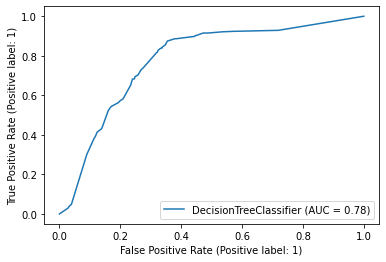

In [46]:
#Decision Tree Classifier
model1 = DecisionTreeClassifier(max_depth=9)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
CM = confusion_matrix(y_test, y_pred1)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN) # Fall out
print("Decision Tree Results")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy:",model1.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1)) # true positive rate, Sensitivity
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print("ROC curve ",metrics.plot_roc_curve(model1,x_test, y_test))
filename = 'DT_Model.pkl'
pickle.dump(model1, open(filename, 'wb'))

### 2)Random Forest Clasifier

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.7960033305578684
Precision Score:  0.7801302931596091
Recall Score:  0.8132427843803056
True Negative Rate:  0.7794117647058824
False Positive Rate:  0.22058823529411764
F2 Score:  0.8063973063973064
F1 Score:  0.7963424771404822
Confusion Matrix: 
[[477 135]
 [110 479]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001FC8F9E1880>


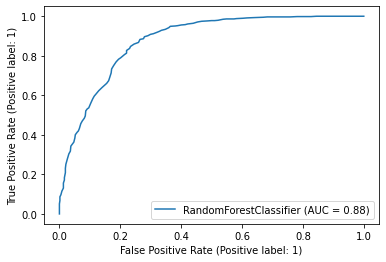

In [47]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
CM = confusion_matrix(y_test, y_pred2)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN) # Fall out or false positive rate

print("Random Forest Clasifier")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2)) #True positive rate
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred2, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2))
print("ROC curve ",metrics.plot_roc_curve(model2,x_test, y_test))
filename = 'RF_Model.pkl'
pickle.dump(model2, open(filename, 'wb'))

### 3)KNN

KNN
Train Accuracy: 0.7883774213705478
Test Accuracy: 0.771856786011657
Precision Score:  0.7172413793103448
Recall Score:  0.8828522920203735
True Negative Rate:  0.6650326797385621
False Positive Rate:  0.3349673202614379
F2 Score:  0.8438818565400844
F1 Score:  0.791476407914764
Confusion Matrix: 
[[407 205]
 [ 69 520]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001FC8F9DB400>


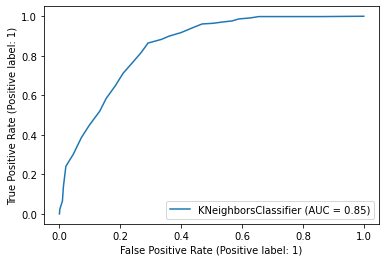

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors = 29)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
CM = confusion_matrix(y_test, y_pred3)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("KNN")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred3, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3))
print("ROC curve ",metrics.plot_roc_curve(model3,x_test, y_test))
filename = 'KNN_Model.pkl'
pickle.dump(model3, open(filename, 'wb'))

### 4)NAIVE BAYES CLASSIFIER

NAIVE BAYES CLASSIFIER
Train Accuracy: 0.7369298062903562
Test Accuracy: 0.7352206494587843
Precision Score:  0.6932952924393724
Recall Score:  0.8251273344651953
True Negative Rate:  0.6486928104575164
False Positive Rate:  0.35130718954248363
F2 Score:  0.7948969578017664
F1 Score:  0.7534883720930233
Confusion Matrix: 
[[397 215]
 [103 486]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001FC8FA7F760>


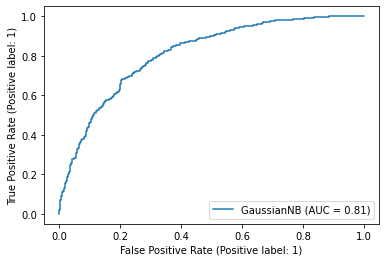

In [49]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
CM = confusion_matrix(y_test, y_pred4)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("NAIVE BAYES CLASSIFIER")
print("Train Accuracy:",model4.score(x_train, y_train))
print("Test Accuracy:",model4.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred4))
print("Recall Score: ",metrics.recall_score(y_test, y_pred4))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred4, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred4))
print("ROC curve ",metrics.plot_roc_curve(model4,x_test, y_test))
filename = 'NB_Model.pkl'
pickle.dump(model4, open(filename, 'wb'))

### 5)Logistic Regression

NAIVE BAYES CLASSIFIER
Train Accuracy: 0.7698396167465111
Test Accuracy: 0.7818484596169858
Precision Score:  0.749618320610687
Recall Score:  0.833616298811545
True Negative Rate:  0.6486928104575164
False Positive Rate:  0.35130718954248363
F2 Score:  0.8153437396213883
F1 Score:  0.7893890675241156
Confusion Matrix: 
[[448 164]
 [ 98 491]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001FC8FB610A0>


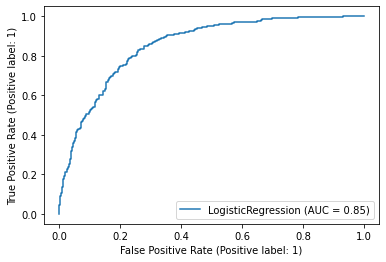

In [50]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial', random_state=1)
LR.fit(x_train, y_train)
y_LR = LR.predict(x_test)
CM = confusion_matrix(y_test, y_pred4)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("NAIVE BAYES CLASSIFIER")
print("Train Accuracy:",LR.score(x_train, y_train))
print("Test Accuracy:",LR.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_LR))
print("Recall Score: ",metrics.recall_score(y_test, y_LR))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_LR, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_LR))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_LR))
print("ROC curve ",metrics.plot_roc_curve(LR,x_test, y_test))
filename = 'LR_Model.pkl'
pickle.dump(LR, open(filename, 'wb'))

### 6)SVM Linear kernel

SVM Linear kernel
Train Accuracy: 0.7698396167465111
Test Accuracy: 0.7835137385512073
Precision Score:  0.7481146304675717
Recall Score:  0.8421052631578947
True Negative Rate:  0.7271241830065359
False Positive Rate:  0.272875816993464
F2 Score:  0.8214640609473335
F1 Score:  0.792332268370607
Confusion Matrix: 
[[445 167]
 [ 93 496]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001FC8FAFFB80>


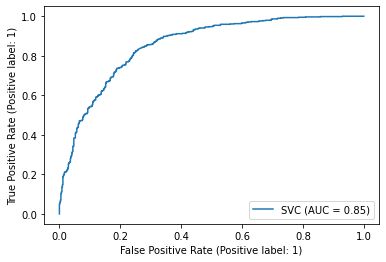

In [51]:
from sklearn import svm
model5 = svm.SVC(kernel='linear', probability=True)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
CM = confusion_matrix(y_test, y_pred5)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("SVM Linear kernel")
print("Train Accuracy:",model5.score(x_train, y_train))
print("Test Accuracy:",model5.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred5))
print("Recall Score: ",metrics.recall_score(y_test, y_pred5))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred5, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred5))
print("ROC curve ",metrics.plot_roc_curve(model5,x_test, y_test))
filename = 'SVML_Model.pkl'
pickle.dump(model5, open(filename, 'wb'))

### 7)SVM Polynomial

SVM Polynomial
Train Accuracy: 0.785253072276609
Test Accuracy: 0.7735220649458784
Precision Score:  0.7008871989860583
Recall Score:  0.9388794567062818
True Negative Rate:  0.6143790849673203
False Positive Rate:  0.38562091503267976
F2 Score:  0.8791732909379969
F1 Score:  0.8026124818577649
Confusion Matrix: 
[[376 236]
 [ 36 553]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001FC8F98E850>


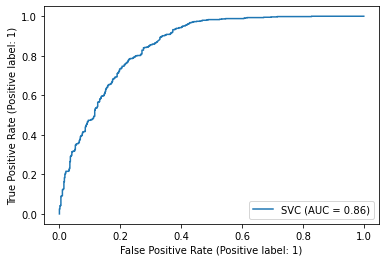

In [52]:
model6 = svm.SVC(kernel='poly', degree=3, probability=True)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
CM = confusion_matrix(y_test, y_pred6)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("SVM Polynomial")
print("Train Accuracy:",model6.score(x_train, y_train))
print("Test Accuracy:",model6.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred6))
print("Recall Score: ",metrics.recall_score(y_test, y_pred6))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred6,beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred6))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred6))
print("ROC curve ",metrics.plot_roc_curve(model6,x_test, y_test))
filename = 'SVMP_Model.pkl'
pickle.dump(model6, open(filename, 'wb'))

### 8)SVM sigmoid

SVM sigmoid
Train Accuracy: 0.6352843157675484
Test Accuracy: 0.6211490424646128
Precision Score:  0.6116666666666667
Recall Score:  0.6230899830220713
True Negative Rate:  0.619281045751634
False Positive Rate:  0.380718954248366
F2 Score:  0.6207713125845737
F1 Score:  0.6173254835996637
Confusion Matrix: 
[[379 233]
 [222 367]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001FC8FAA8190>


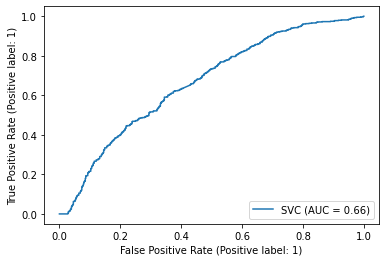

In [53]:
model7 = svm.SVC(kernel='sigmoid', probability=True)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
CM = confusion_matrix(y_test, y_pred7)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("SVM sigmoid")
print("Train Accuracy:",model7.score(x_train, y_train))
print("Test Accuracy:",model7.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred7))
print("Recall Score: ",metrics.recall_score(y_test, y_pred7))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred7, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred7))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred7))
print("ROC curve ",metrics.plot_roc_curve(model7,x_test, y_test))
filename = 'SVMS_Model.pkl'
pickle.dump(model7, open(filename, 'wb'))

### 9)SVM rbf

SVM rbf
Train Accuracy: 0.8329514684440742
Test Accuracy: 0.8176519567027477
Precision Score:  0.7820121951219512
Recall Score:  0.8709677419354839
True Negative Rate:  0.7663398692810458
False Positive Rate:  0.23366013071895425
F2 Score:  0.851593625498008
F1 Score:  0.8240963855421687
Confusion Matrix: 
[[469 143]
 [ 76 513]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001FC8F967280>


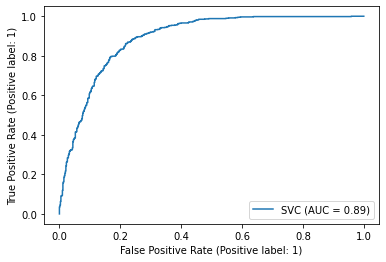

In [54]:
model8 = svm.SVC(kernel='rbf', probability=True)
model8.fit(x_train, y_train)
y_pred8 = model8.predict(x_test)
CM = confusion_matrix(y_test, y_pred8)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("SVM rbf")
print("Train Accuracy:",model8.score(x_train, y_train))
print("Test Accuracy:",model8.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred8))
print("Recall Score: ",metrics.recall_score(y_test, y_pred8))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred8,beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred8))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred8))
print("ROC curve ",metrics.plot_roc_curve(model8,x_test, y_test))
filename = 'SVMR_Model.pkl'
pickle.dump(model8, open(filename, 'wb'))

SVM rbf
SVM rbf Accuracy:  81.76519567027476 %
Train Accuracy: 0.8329514684440742
Test Accuracy: 0.8176519567027477
Precision Score:  0.8220333585851575
Recall Score:  0.8176519567027477
F1 Score:  0.817278770244458
Confusion Matrix: 
[[469 143]
 [ 76 513]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001FC8F90D550>


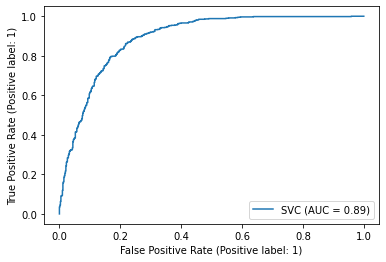

In [55]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

model10 = svm.SVC(kernel='rbf', probability=True)
model10.fit(x_train, y_train)
y_pred10 = model10.predict(x_test)

print("SVM rbf")
print("SVM rbf Accuracy: ",accuracy_score(y_test, y_pred10)*100,"%")
# print("Train Accuracy:",model2.score(x_train1, y_train1))
# print("Test Accuracy:",model2.score(x_test1, y_test1))
print("Train Accuracy:",model10.score(x_train, y_train))
print("Test Accuracy:",model10.score(x_test, y_test))
# print("Precision Score: ",metrics.precision_score(y_test1, y_pred2, average='weighted'))
# print("Recall Score: ",metrics.recall_score(y_test1, y_pred2, average='weighted'))
print("Precision Score: ",metrics.precision_score(y_test, y_pred10, average='weighted'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred10, average='weighted'))
# print("F1 Score: ",metrics.f1_score(y_test1, y_pred2, average='weighted'))
# print("Confusion Matrix: ")
# print(confusion_matrix(y_test1, y_pred2))
print("F1 Score: ",metrics.f1_score(y_test, y_pred10,average='weighted'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred10))
print("ROC curve ",metrics.plot_roc_curve(model10,x_test, y_test))
#plot_multiclass_roc(model10, x_test, y_test, n_classes=3, figsize=(6, 6))

## Single Image Detection

In [174]:
#Recognition &Validation
#Assigning path with any any class image
data=[]
path=r"C:\Users\Samrat\Desktop\CV-PreProcessing\P-img\3.jpg"


#Repeated the process of image pre-processing and feature extraction
a=cv2.imread(path)
resize=(430,280)

#resize image
img=cv2.resize(a,resize)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#initialise sift descriptor
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(gray, None)

#convert the descriptor array into a dataframe format
out=pd.DataFrame(descriptors)
print("Descriptor Shape:",out.shape)

#initialise Kmeans and create 5 clusters


#train the model for the features i.e. for all elements in the Dataframe
array_double = np.array(out, dtype=np.double)
a=kmeans.predict(array_double)

#get the values of the histogram for one image only for 5 clusters i.e. in 5 bins
#kmeans.labels_ give us the label vlaue of the feature that its clustered into
#hist will give the hostogram for all those vlaues
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

#append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
data.append(hist[0])

Output = pd.DataFrame(data)
print("Histogram:\n",Output)

Descriptor Shape: (500, 32)
Histogram:
    0   1   2   3   4   5   6   7   8   9   10  11  12
0  31  48  55  43  12  44  43  22  28  48  27  48  51


In [175]:
from sklearn.preprocessing import StandardScaler
MuktaS = StandardScaler()
Mukta = MuktaS.fit_transform(Output)

In [176]:
Mukta

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [177]:
Mukta.shape

(1, 13)

In [178]:
MB = pca.transform(Mukta)

In [179]:
MB.shape

(1, 9)

In [180]:
MB

array([[-2.04586911e-16,  1.76612202e-17, -1.19836575e-16,
        -2.28642014e-17,  3.37501797e-17, -7.19008797e-17,
        -2.05072347e-16,  1.65945395e-16,  1.07175000e-16]])

In [181]:
pickle_in = open('RFC.sav', 'rb')
model1 = pickle.load(pickle_in )
pickle_in.close()

C:\Users\Samrat\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Samrat\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [182]:
#prediction
y_pred1 = model1.predict(MB)

#prints the prediction of the class
print(y_pred1)

[1]


In [183]:
from sklearn.svm import SVC
DhoniSVM_LK = SVC(kernel='rbf')
Dhoni_LK = DhoniSVM_LK.fit(x_train, y_train)

In [184]:
filename = 'SVC_RBF_PCA_3.sav'
pickle.dump(Dhoni_LK, open(filename, 'wb'))

In [185]:
Dhoni_LK

SVC()

In [186]:
y_pred_LK = Dhoni_LK.predict(x_test)

In [187]:
y_pred_LK

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [188]:
from sklearn.metrics import confusion_matrix

In [189]:
confusion_matrix(y_test, y_pred_LK)

array([[438, 174],
       [ 80, 509]], dtype=int64)

In [190]:
from sklearn.metrics import accuracy_score

In [191]:
accuracy_score(y_test, y_pred_LK)

0.7885095753538718

In [192]:
y_pred1 = model1.predict(MB)

#prints the prediction of the class
print(y_pred1)

[1]


# Classification using Voting classifiers

In [9]:
from sklearn.naive_bayes import GaussianNB
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# group / ensemble of models
estimator = []
estimator.append(('RFC',RandomForestClassifier(max_depth=13, n_estimators=170)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=30)))
estimator.append(('NBC', GaussianNB()))


# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
print("Train Accuracy:", vot_hard.score(x_train, y_train))
print("Test Accuracy:", vot_hard.score(x_test, y_test))
print("Precision Score: ", metrics.precision_score(y_test, y_pred))
print("Recall Score: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
accuracy = vot_hard.score(x_test,y_test)
print(y_pred)
print(accuracy)

# group / ensemble of models
estimator = []
estimator.append(('RFC',RandomForestClassifier(max_depth=13, n_estimators=170)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=30)))
estimator.append(('NBC', GaussianNB()))


# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)
#print("Hard Voting Classifier Accuracy: ",accuracy_score(y_test, y_pred9)*100,"%")
print("Train Accuracy:", vot_soft.score(x_train, y_train))
print("Test Accuracy:", vot_soft.score(x_test, y_test))
print("Precision Score: ", metrics.precision_score(y_test, y_pred))
print("Recall Score: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
accuracy = vot_soft.score(x_test,y_test)
print(y_pred)
print(accuracy)

Train Accuracy: 0.8479483440949802
Test Accuracy: 0.7810158201498751
Precision Score:  0.7404129793510325
Recall Score:  0.8522920203735145
F1 Score:  0.7924230465666929
Confusion Matrix: 
[[436 176]
 [ 87 502]]
[1 0 0 ... 1 0 0]
0.7810158201498751
Train Accuracy: 0.9018954384503228
Test Accuracy: 0.761865112406328
Precision Score:  0.7312977099236642
Recall Score:  0.8132427843803056
F1 Score:  0.7700964630225081
Confusion Matrix: 
[[436 176]
 [110 479]]
[1 0 0 ... 1 0 0]
0.761865112406328


## Testing And Validation of multiple Images

In [194]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import random
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import pandas as pd              
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  
import PIL       
import PIL.Image
import os       
import os.path
from PIL import Image
import cv2 as cv
import cv2
from scipy.stats import stats
import pickle
from sklearn. model_selection import train_test_split
from sklearn.svm import SVC
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer   # to normalize sift feature extracted 

In [195]:
pickle_in = open('RFC.sav', 'rb')
model = pickle.load(pickle_in )
pickle_in.close()

C:\Users\Samrat\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Samrat\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [196]:
pickle_in = open('Kmeans_CL_5_Model.sav', 'rb')
kmeans = pickle.load(pickle_in )
pickle_in.close()

C:\Users\Samrat\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator KMeans from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [197]:
#load previously dumped hog image dataset 
pickle_in = open('PCA_3_Model.sav', 'rb')
pca = pickle.load(pickle_in )
pickle_in.close()

C:\Users\Samrat\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator PCA from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [131]:
b=r'C:\Users\Samrat\Desktop\CV-PreProcessing\testing-img'
data =[]
for filename in os.listdir(b):
    
    path=os.path.join(b,filename)
    a=cv2.imread(path)
    
    #resize imageAC
    resize=(430,280)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #initialise sift descriptor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)

    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    array_double = np.array(out, dtype=np.double)
#     print(out)

    a=kmeans.predict(array_double) 
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    data.append(hist[0])
    Output = pd.DataFrame(data)
    #print("Histogram:\n",Output)

norm = Normalizer()
normalized = norm.fit_transform(Output)  
normalized.shape# normalize 

Standardize = StandardScaler()
x_scaled = Standardize.fit_transform(normalized)
pd.DataFrame(normalized)
print(x_scaled.shape)


x_pca = pca.transform(x_scaled)
x_pca = pd.DataFrame(x_pca)
x_pca

# First 1000 images are of traffic
#m = x_pca.iloc[:1000,:]
#prediction
y_pred1 = model.predict(x_pca)

#prints the prediction of the class
print(y_pred1)
y_pred1
a=np.count_nonzero(y_pred1==1)
print("Traffic :",a)
a=np.count_nonzero(y_pred1==0)
print("Non Traffic :",a)


(1600, 13)
[1 1 0 ... 1 1 1]
Traffic : 841
Non Traffic : 759
